# Recommendation System - Sai Eshwar Tadepalli

## Part 1 - Data Preparation (Do not touch)

In [831]:
import requests
import pandas as pd

# IMDb API endpoint URL
url = 'https://imdb8.p.rapidapi.com/auto-complete'

# IMDb API query parameters
params = {'q': 'zindagi'}

# IMDb API request headers
headers = {
    'X-RapidAPI-Key': '9a9eb0b9afmsh945ee84069ef0c8p1461b7jsn52b320d3ef04',
    'X-RapidAPI-Host': 'imdb8.p.rapidapi.com'
}

try:
    # Send a GET request to the IMDb API
    response = requests.get(url, params=params, headers=headers)
    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Convert response data to JSON format
        data = response.json()
        # Create DataFrame from the JSON data
        df = pd.DataFrame(data['d'])

        # Load existing Excel file if it exists, otherwise create a new DataFrame
        try:
            existing_df = pd.read_excel('imdb_results.xlsx')
            df_combined = pd.concat([existing_df, df], ignore_index=True)
        except FileNotFoundError:
            df_combined = df

        # Save combined DataFrame to Excel file
        df_combined.to_excel('imdb_results.xlsx', index=False)
        print("Data saved successfully.")
    else:
        print('Error:', response.status_code)
except Exception as e:
    print('An error occurred:', e)

Data saved successfully.


In [832]:
import pandas as pd
from IPython.display import display

# Read the data from the Excel file
try:
    df = pd.read_excel('imdb_results.xlsx')
    # Display the DataFrame as a table
    display(df)
except FileNotFoundError:
    print("The file 'imdb_results.xlsx' does not exist.")

,i,id,l,q,qid,rank,s,y,yr
0,"{'height': 2147, 'imageUrl': 'https://m.media-...",tt14564000,Guntur Kaaram,feature,movie,6177.0,"Mahesh Babu, Sreeleela",2024.0,NaN
1,"{'height': 1600, 'imageUrl': 'https://m.media-...",tt21908802,Sweet Kaaram Coffee,TV series,tvSeries,33880.0,"Lakshmi, Madhoo",2023.0,NaN
2,"{'height': 1600, 'imageUrl': 'https://m.media-...",tt28684462,Kaagaz 2,feature,movie,5287.0,"Anupam Kher, Darshan Kumaar",2024.0,NaN
3,"{'height': 1801, 'imageUrl': 'https://m.media-...",nm8050260,Natacha Karam,NaN,NaN,4905.0,"Actress, The Brave (2017-2018)",NaN,NaN
4,"{'height': 1080, 'imageUrl': 'https://m.media-...",tt9569610,Kaagaz,feature,movie,24419.0,"Pankaj Tripathi, Monal Gajjar",2021.0,NaN
...,...,...,...,...,...,...,...,...,...
2041,"{'height': 1280, 'imageUrl': 'https://m.media-...",tt5297578,Zindagi Kitni Haseen Hay,feature,movie,47431.0,"Feroze Khan, Sajal Ali",2016.0,NaN
2042,"{'height': 900, 'imageUrl': 'https://m.media-a...",tt12826694,Zindagi Jhand Hai,TV series,tvSeries,60671.0,"Mohit Kesar, Khwahish Matthew",2020.0,NaN
2043,"{'height': 1000, 'imageUrl': 'https://m.media-...",tt11813946,Zindagi inShort,TV series,tvSeries,85247.0,"Neena Gupta, Divya Dutta",2020.0,2020-2020
2044,"{'height': 960, 'imageUrl': 'https://m.media-a...",tt11497834,Circus of Life,feature,movie,82502.0,"Arif Hassan, Samiya Mumtaz",2019.0,NaN


In [833]:
df.tail(n=10)

,i,id,l,q,qid,rank,s,y,yr
2036,"{'height': 857, 'imageUrl': 'https://m.media-a...",nm8153605,Krishna Andavolu,NaN,NaN,200590.0,"Producer, Weediquette (2016-2017)",NaN,NaN
2037,"{'height': 1500, 'imageUrl': 'https://m.media-...",tt6842524,"Hare Krishna! The Mantra, the Movement and the...",feature,movie,114550.0,"A.C. Bhaktivedanta Swami, Bhaktisiddhanta Sara...",2017.0,NaN
2038,"{'height': 2048, 'imageUrl': 'https://m.media-...",tt1562872,Zindagi Na Milegi Dobara,feature,movie,15799.0,"Hrithik Roshan, Farhan Akhtar",2011.0,NaN
2039,"{'height': 1333, 'imageUrl': 'https://m.media-...",tt5946128,Dear Zindagi,feature,movie,24221.0,"Alia Bhatt, Shah Rukh Khan",2016.0,NaN
2040,"{'height': 918, 'imageUrl': 'https://m.media-a...",tt9884202,Zindagi Zindabaad,feature,movie,40072.0,"Ninja, Mandy Takhar",2023.0,NaN
2041,"{'height': 1280, 'imageUrl': 'https://m.media-...",tt5297578,Zindagi Kitni Haseen Hay,feature,movie,47431.0,"Feroze Khan, Sajal Ali",2016.0,NaN
2042,"{'height': 900, 'imageUrl': 'https://m.media-a...",tt12826694,Zindagi Jhand Hai,TV series,tvSeries,60671.0,"Mohit Kesar, Khwahish Matthew",2020.0,NaN
2043,"{'height': 1000, 'imageUrl': 'https://m.media-...",tt11813946,Zindagi inShort,TV series,tvSeries,85247.0,"Neena Gupta, Divya Dutta",2020.0,2020-2020
2044,"{'height': 960, 'imageUrl': 'https://m.media-a...",tt11497834,Circus of Life,feature,movie,82502.0,"Arif Hassan, Samiya Mumtaz",2019.0,NaN
2045,"{'height': 1000, 'imageUrl': 'https://m.media-...",tt2828240,Zindagi Gulzar Hai,TV series,tvSeries,71608.0,"Sanam Saeed, Fawad Khan",2012.0,2012-2013


In [24]:
import pandas as pd

# Read the CSV file
input_csv_path = "/content/imdb_results.csv"
df = pd.read_csv(input_csv_path)

# Print all column names
print("Column Names:")
print(df.columns)

Column Names:
Index(['i', 'id', 'l', 'q', 'qid', 'rank', 's', 'y', 'yr'], dtype='object')


In [70]:
import pandas as pd

# Read the CSV file
input_csv_path = "/content/imdb_results.csv"
df = pd.read_csv(input_csv_path)

# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:")
print(df.head())

First few rows of the DataFrame:
                                                   i          id  \
0  {'height': 2147, 'imageUrl': 'https://m.media-...  tt14564000   
1  {'height': 1600, 'imageUrl': 'https://m.media-...  tt21908802   
2  {'height': 1600, 'imageUrl': 'https://m.media-...  tt28684462   
3  {'height': 1801, 'imageUrl': 'https://m.media-...   nm8050260   
4  {'height': 1080, 'imageUrl': 'https://m.media-...   tt9569610   

                     l          q       qid     rank  \
0        Guntur Kaaram    feature     movie   6177.0   
1  Sweet Kaaram Coffee  TV series  tvSeries  33880.0   
2             Kaagaz 2    feature     movie   5287.0   
3        Natacha Karam        NaN       NaN   4905.0   
4               Kaagaz    feature     movie  24419.0   

                                s       y   yr  
0          Mahesh Babu, Sreeleela  2024.0  NaN  
1                 Lakshmi, Madhoo  2023.0  NaN  
2     Anupam Kher, Darshan Kumaar  2024.0  NaN  
3  Actress, The Brave (20

In [42]:
import http.client
import json

def get_movie_genres(movie_id):
    conn = http.client.HTTPSConnection("imdb8.p.rapidapi.com")
    headers = {
        'X-RapidAPI-Key': 'e523378212mshcc6c0ef26bd5764p15f9a3jsn2ddb6afafbe8',
        'X-RapidAPI-Host': 'imdb8.p.rapidapi.com'
    }
    try:
        conn.request("GET", f"/title/v2/get-genres?tconst={movie_id}", headers=headers)
        res = conn.getresponse()
        data = res.read()
        response_data = json.loads(data.decode("utf-8"))

        # Navigate through the nested structure based on the API response
        genres_data = response_data.get('data', {}).get('title', {}).get('titleGenres', {}).get('genres', [])
        genres = [genre_info['genre']['text'] for genre_info in genres_data]

        return genres
    except Exception as e:
        print(f"Error fetching genre information for movie ID {movie_id}: {e}")
        return []

# Test the function with the provided movie ID
movie_id = 'tt5290794'
genres = get_movie_genres(movie_id)
print(f"Genres for movie ID {movie_id}: {genres}")

Genres for movie ID tt5290794: ['Action', 'Romance']


In [43]:
import pandas as pd
import http.client
import json

def get_movie_genres(movie_id):
    conn = http.client.HTTPSConnection("imdb8.p.rapidapi.com")
    headers = {
        'X-RapidAPI-Key': 'e523378212mshcc6c0ef26bd5764p15f9a3jsn2ddb6afafbe8',
        'X-RapidAPI-Host': 'imdb8.p.rapidapi.com'
    }
    try:
        conn.request("GET", f"/title/v2/get-genres?tconst={movie_id}", headers=headers)
        res = conn.getresponse()
        data = res.read()
        response_data = json.loads(data.decode("utf-8"))

        genres_data = response_data.get('data', {}).get('title', {}).get('titleGenres', {}).get('genres', [])
        genres = [genre_info['genre']['text'] for genre_info in genres_data]

        return genres
    except Exception as e:
        print(f"Error fetching genre information for movie ID {movie_id}: {e}")
        return []

# Path to your CSV file
input_csv_path = "/content/imdb_results.csv"

# Read the entire CSV file
df = pd.read_csv(input_csv_path)

# Iterate over rows starting from the 500th, making API calls only for IDs starting with "tt"
for index, row in df.iloc[499:].iterrows():  # Python is zero-indexed, so 499 represents the 500th row
    movie_id = row['id']
    if movie_id.startswith('tt'):
        genres = get_movie_genres(movie_id)
        if genres:  # Update the DataFrame if genres were fetched
            df.at[index, 'Genres'] = ', '.join(genres)
    else:
        # Optionally, update rows not starting with 'tt' to NaN for clarity, though they should already be NaN
        df.at[index, 'Genres'] = pd.NA

# Save the updated DataFrame back to the original CSV file or a new one
output_csv_path = "/content/genres.csv"  # You can overwrite the original file if desired
df.to_csv(output_csv_path, index=False)
print(f"Updated genre information saved to {output_csv_path}")

Error fetching genre information for movie ID tt0323769: 'NoneType' object has no attribute 'get'
Error fetching genre information for movie ID tt0255314: 'NoneType' object has no attribute 'get'
Error fetching genre information for movie ID tt0244034: 'NoneType' object has no attribute 'get'
Error fetching genre information for movie ID tt1352730: 'NoneType' object has no attribute 'get'
Error fetching genre information for movie ID tt0320395: 'NoneType' object has no attribute 'get'
Error fetching genre information for movie ID tt0319643: 'NoneType' object has no attribute 'get'
Error fetching genre information for movie ID tt9395766: 'NoneType' object has no attribute 'get'
Error fetching genre information for movie ID tt28674121: 'NoneType' object has no attribute 'get'
Error fetching genre information for movie ID tt0264630: 'NoneType' object has no attribute 'get'
Error fetching genre information for movie ID tt0786976: 'NoneType' object has no attribute 'get'
Error fetching genr

In [71]:
import pandas as pd

# Path to the genre CSV file
genre_csv_path = "/content/genres.csv"
imdb_csv = "/content/imdb_results.csv"

# Read the CSV file into a DataFrame
genre_df = pd.read_csv(genre_csv_path)
imdb_df = pd.read_csv(imdb_csv)

# Display the DataFrame
display(genre_df)

,i,id,l,q,qid,rank,s,y,yr,Genres
0,"{'height': 2147, 'imageUrl': 'https://m.media-...",tt14564000,Guntur Kaaram,feature,movie,6177.0,"Mahesh Babu, Sreeleela",2024.0,NaN,"['Action', 'Drama']"
1,"{'height': 1600, 'imageUrl': 'https://m.media-...",tt21908802,Sweet Kaaram Coffee,TV series,tvSeries,33880.0,"Lakshmi, Madhoo",2023.0,NaN,"['Drama', 'Family']"
2,"{'height': 1600, 'imageUrl': 'https://m.media-...",tt28684462,Kaagaz 2,feature,movie,5287.0,"Anupam Kher, Darshan Kumaar",2024.0,NaN,['Drama']
3,"{'height': 1801, 'imageUrl': 'https://m.media-...",nm8050260,Natacha Karam,NaN,NaN,4905.0,"Actress, The Brave (2017-2018)",NaN,NaN,NaN
4,"{'height': 1080, 'imageUrl': 'https://m.media-...",tt9569610,Kaagaz,feature,movie,24419.0,"Pankaj Tripathi, Monal Gajjar",2021.0,NaN,"['Biography', 'Comedy', 'Drama']"
...,...,...,...,...,...,...,...,...,...,...
2041,"{'height': 1280, 'imageUrl': 'https://m.media-...",tt5297578,Zindagi Kitni Haseen Hay,feature,movie,47431.0,"Feroze Khan, Sajal Ali",2016.0,NaN,NaN
2042,"{'height': 900, 'imageUrl': 'https://m.media-a...",tt12826694,Zindagi Jhand Hai,TV series,tvSeries,60671.0,"Mohit Kesar, Khwahish Matthew",2020.0,NaN,NaN
2043,"{'height': 1000, 'imageUrl': 'https://m.media-...",tt11813946,Zindagi inShort,TV series,tvSeries,85247.0,"Neena Gupta, Divya Dutta",2020.0,2020-2020,NaN
2044,"{'height': 960, 'imageUrl': 'https://m.media-a...",tt11497834,Circus of Life,feature,movie,82502.0,"Arif Hassan, Samiya Mumtaz",2019.0,NaN,NaN


In [72]:
# Now that the genres.csv file has been uploaded, let's read the file again
# and format the 'Genres' column for the first 500 rows.

file_path = '/content/genres.csv'

# Read the CSV file
df = pd.read_csv(file_path)

# Ensure the 'Genres' column is interpreted as a list
# It seems these might be stored as string representations of lists
import ast  # To safely evaluate strings as lists

# Convert genres string to list and then to a formatted string for the first 500 rows
df['Genres'] = df['Genres'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else x)
df['FormattedGenres'] = df['Genres'].apply(lambda x: ', '.join(x) if isinstance(x, list) else '')

# Check the first few formatted genres to verify the conversion
df['FormattedGenres'].head(500)

0                 Action, Drama
1                 Drama, Family
2                         Drama
3                              
4      Biography, Comedy, Drama
                 ...           
495               Drama, Family
496            Musical, Romance
497           Mystery, Thriller
498                     Romance
499                            
Name: FormattedGenres, Length: 500, dtype: object

In [73]:
df.tail(n=1550)

,i,id,l,q,qid,rank,s,y,yr,Genres,FormattedGenres
496,"{'height': 4800, 'imageUrl': 'https://m.media-...",tt4431392,Malli Malli Idi Rani Roju,feature,movie,94928.0,"Sharwanand, Nithya Menen",2015.0,NaN,"[Musical, Romance]","Musical, Romance"
497,"{'height': 600, 'imageUrl': 'https://m.media-a...",tt0473604,Anukokunda Oka Roju,feature,movie,146478.0,"Charmme Kaur, Jagapathi Babu",2005.0,NaN,"[Mystery, Thriller]","Mystery, Thriller"
498,"{'height': 640, 'imageUrl': 'https://m.media-a...",tt21305016,Premikula Roju,feature,movie,172551.0,"Sonali Bendre, Kunal Singh",1999.0,NaN,[Romance],Romance
499,NaN,nm14177404,Roju,NaN,NaN,753361.0,"Writer, Sardar (2022)",NaN,NaN,NaN,
500,"{'height': 1250, 'imageUrl': 'https://m.media-...",tt5290794,Bhale Manchi Roju,feature,movie,224271.0,"Sudheer Babu Posani, Wamiqa Gabbi",2015.0,NaN,NaN,
...,...,...,...,...,...,...,...,...,...,...,...
2041,"{'height': 1280, 'imageUrl': 'https://m.media-...",tt5297578,Zindagi Kitni Haseen Hay,feature,movie,47431.0,"Feroze Khan, Sajal Ali",2016.0,NaN,NaN,
2042,"{'height': 900, 'imageUrl': 'https://m.media-a...",tt12826694,Zindagi Jhand Hai,TV series,tvSeries,60671.0,"Mohit Kesar, Khwahish Matthew",2020.0,NaN,NaN,
2043,"{'height': 1000, 'imageUrl': 'https://m.media-...",tt11813946,Zindagi inShort,TV series,tvSeries,85247.0,"Neena Gupta, Divya Dutta",2020.0,2020-2020,NaN,
2044,"{'height': 960, 'imageUrl': 'https://m.media-a...",tt11497834,Circus of Life,feature,movie,82502.0,"Arif Hassan, Samiya Mumtaz",2019.0,NaN,NaN,


In [74]:
# Save the modified DataFrame with the 'FormattedGenres' column to a new CSV file

# Define the path for the new CSV file
new_file_path = '/content/genres.csv'

# Save the first 500 rows to a new CSV, including the formatted genres column
df.head(500).to_csv(new_file_path, index=False)

new_file_path

'/content/genres.csv'

In [75]:
import pandas as pd

# Path to the genre CSV file
genre_path = "/content/genres.csv"
genre_500_path = "/content/genres_500to.csv"
genre_1_path = '/content/genres (1).csv'
combined_path = '/content/combined_genres.csv'

# Read the CSV file into a DataFrame
genre_df = pd.read_csv(genre_path)
genre_500_df = pd.read_csv(genre_500_path)
genre_1_df = pd.read_csv(genre_1_path)
combined_df = pd.read_csv(combined_path)

In [76]:
display(genre_1_df)

,i,id,l,q,qid,rank,s,y,yr,Genres,FormattedGenres
0,"{'height': 2147, 'imageUrl': 'https://m.media-...",tt14564000,Guntur Kaaram,feature,movie,6177.0,"Mahesh Babu, Sreeleela",2024.0,NaN,"['Action', 'Drama']","Action, Drama"
1,"{'height': 1600, 'imageUrl': 'https://m.media-...",tt21908802,Sweet Kaaram Coffee,TV series,tvSeries,33880.0,"Lakshmi, Madhoo",2023.0,NaN,"['Drama', 'Family']","Drama, Family"
2,"{'height': 1600, 'imageUrl': 'https://m.media-...",tt28684462,Kaagaz 2,feature,movie,5287.0,"Anupam Kher, Darshan Kumaar",2024.0,NaN,['Drama'],Drama
3,"{'height': 1801, 'imageUrl': 'https://m.media-...",nm8050260,Natacha Karam,NaN,NaN,4905.0,"Actress, The Brave (2017-2018)",NaN,NaN,NaN,NaN
4,"{'height': 1080, 'imageUrl': 'https://m.media-...",tt9569610,Kaagaz,feature,movie,24419.0,"Pankaj Tripathi, Monal Gajjar",2021.0,NaN,"['Biography', 'Comedy', 'Drama']","Biography, Comedy, Drama"
...,...,...,...,...,...,...,...,...,...,...,...
495,"{'height': 699, 'imageUrl': 'https://m.media-a...",tt10940334,Prati Roju Pandaage,feature,movie,89765.0,"Sai Dharam Tej, Raashi Khanna",2019.0,NaN,"['Drama', 'Family']","Drama, Family"
496,"{'height': 4800, 'imageUrl': 'https://m.media-...",tt4431392,Malli Malli Idi Rani Roju,feature,movie,94928.0,"Sharwanand, Nithya Menen",2015.0,NaN,"['Musical', 'Romance']","Musical, Romance"
497,"{'height': 600, 'imageUrl': 'https://m.media-a...",tt0473604,Anukokunda Oka Roju,feature,movie,146478.0,"Charmme Kaur, Jagapathi Babu",2005.0,NaN,"['Mystery', 'Thriller']","Mystery, Thriller"
498,"{'height': 640, 'imageUrl': 'https://m.media-a...",tt21305016,Premikula Roju,feature,movie,172551.0,"Sonali Bendre, Kunal Singh",1999.0,NaN,['Romance'],Romance


In [77]:
display(genre_500_df)

,i,id,l,q,qid,rank,s,y,yr,Genres
0,"{'height': 2147, 'imageUrl': 'https://m.media-...",tt14564000,Guntur Kaaram,feature,movie,6177.0,"Mahesh Babu, Sreeleela",2024.0,NaN,NaN
1,"{'height': 1600, 'imageUrl': 'https://m.media-...",tt21908802,Sweet Kaaram Coffee,TV series,tvSeries,33880.0,"Lakshmi, Madhoo",2023.0,NaN,NaN
2,"{'height': 1600, 'imageUrl': 'https://m.media-...",tt28684462,Kaagaz 2,feature,movie,5287.0,"Anupam Kher, Darshan Kumaar",2024.0,NaN,NaN
3,"{'height': 1801, 'imageUrl': 'https://m.media-...",nm8050260,Natacha Karam,NaN,NaN,4905.0,"Actress, The Brave (2017-2018)",NaN,NaN,NaN
4,"{'height': 1080, 'imageUrl': 'https://m.media-...",tt9569610,Kaagaz,feature,movie,24419.0,"Pankaj Tripathi, Monal Gajjar",2021.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2041,"{'height': 1280, 'imageUrl': 'https://m.media-...",tt5297578,Zindagi Kitni Haseen Hay,feature,movie,47431.0,"Feroze Khan, Sajal Ali",2016.0,NaN,"Adventure, Drama, Romance"
2042,"{'height': 900, 'imageUrl': 'https://m.media-a...",tt12826694,Zindagi Jhand Hai,TV series,tvSeries,60671.0,"Mohit Kesar, Khwahish Matthew",2020.0,NaN,Drama
2043,"{'height': 1000, 'imageUrl': 'https://m.media-...",tt11813946,Zindagi inShort,TV series,tvSeries,85247.0,"Neena Gupta, Divya Dutta",2020.0,2020-2020,"Comedy, Drama, Romance"
2044,"{'height': 960, 'imageUrl': 'https://m.media-a...",tt11497834,Circus of Life,feature,movie,82502.0,"Arif Hassan, Samiya Mumtaz",2019.0,NaN,Drama


In [78]:
# Paths to the newly uploaded files
file_path_1 = '/content/genres (1).csv'
file_path_500to = '/content/genres_500to.csv'

# Read the CSV files
df1 = pd.read_csv(file_path_1)
df_500to = pd.read_csv(file_path_500to)

# Remove the 'Genres' column from df1 and rename 'FormattedGenres' to 'Genres'
df1 = df1.drop(columns=['Genres'])
df1 = df1.rename(columns={'FormattedGenres': 'Genres'})

# Combine the first 499 rows of df1 with df_500to
combined_df = pd.concat([df1.iloc[:500], df_500to])

# Save the combined DataFrame to a new CSV file
combined_file_path = '/content/combined_genres.csv'
combined_df.to_csv(combined_file_path, index=False)

display(combined_file_path)

'/content/combined_genres.csv'

In [79]:
display(combined_df)

,i,id,l,q,qid,rank,s,y,yr,Genres
0,"{'height': 2147, 'imageUrl': 'https://m.media-...",tt14564000,Guntur Kaaram,feature,movie,6177.0,"Mahesh Babu, Sreeleela",2024.0,NaN,"Action, Drama"
1,"{'height': 1600, 'imageUrl': 'https://m.media-...",tt21908802,Sweet Kaaram Coffee,TV series,tvSeries,33880.0,"Lakshmi, Madhoo",2023.0,NaN,"Drama, Family"
2,"{'height': 1600, 'imageUrl': 'https://m.media-...",tt28684462,Kaagaz 2,feature,movie,5287.0,"Anupam Kher, Darshan Kumaar",2024.0,NaN,Drama
3,"{'height': 1801, 'imageUrl': 'https://m.media-...",nm8050260,Natacha Karam,NaN,NaN,4905.0,"Actress, The Brave (2017-2018)",NaN,NaN,NaN
4,"{'height': 1080, 'imageUrl': 'https://m.media-...",tt9569610,Kaagaz,feature,movie,24419.0,"Pankaj Tripathi, Monal Gajjar",2021.0,NaN,"Biography, Comedy, Drama"
...,...,...,...,...,...,...,...,...,...,...
2041,"{'height': 1280, 'imageUrl': 'https://m.media-...",tt5297578,Zindagi Kitni Haseen Hay,feature,movie,47431.0,"Feroze Khan, Sajal Ali",2016.0,NaN,"Adventure, Drama, Romance"
2042,"{'height': 900, 'imageUrl': 'https://m.media-a...",tt12826694,Zindagi Jhand Hai,TV series,tvSeries,60671.0,"Mohit Kesar, Khwahish Matthew",2020.0,NaN,Drama
2043,"{'height': 1000, 'imageUrl': 'https://m.media-...",tt11813946,Zindagi inShort,TV series,tvSeries,85247.0,"Neena Gupta, Divya Dutta",2020.0,2020-2020,"Comedy, Drama, Romance"
2044,"{'height': 960, 'imageUrl': 'https://m.media-a...",tt11497834,Circus of Life,feature,movie,82502.0,"Arif Hassan, Samiya Mumtaz",2019.0,NaN,Drama


## Part 2 - Data Preparation (Do not touch)

In [80]:
# Let's read the combined_genres.csv file to explore the dataset and consider renaming columns if necessary

combined_genres_path = '/content/combined_genres.csv'
combined_genres_df = pd.read_csv(combined_genres_path)

# Display the columns of the combined dataset
combined_genres_df.columns

Index(['i', 'id', 'l', 'q', 'qid', 'rank', 's', 'y', 'yr', 'Genres'], dtype='object')

In [82]:
# Renaming the columns based on the provided instructions
renamed_columns_corrected = {
    'i': 'imageURL',
    'id': 'movieId',  # Adjusting based on previously renamed columns
    'title': 'title',  # Placeholder as 'l' wasn't specified for renaming
    'q': 'type',
    'qid': 'typeId',
    'imdbRank': 'imdbRank',  # Placeholder as 'rank' wasn't specified for renaming
    'cast': 'cast',  # Placeholder as 's' wasn't specified for renaming
    'y': 'releaseYear',
    'yr': 'duration',
    'genres': 'genres'  # Assuming consistency in casing
}

combined_genres_df = combined_genres_df.rename(columns=renamed_columns_corrected)

# Confirm the new column names
combined_genres_df.columns


Index(['imageURL', 'movieId', 'title', 'type', 'typeId', 'imdbRank', 'cast',
       'releaseYear', 'duration', 'genres'],
      dtype='object')

In [83]:
# Splitting 'cast' into 'cast1' and 'cast2'
combined_genres_df[['cast1', 'cast2']] = combined_genres_df['cast'].str.split(',', expand=True, n=1)

# Confirm the changes and new column names
combined_genres_df.columns

Index(['imageURL', 'movieId', 'title', 'type', 'typeId', 'imdbRank', 'cast',
       'releaseYear', 'duration', 'genres', 'cast1', 'cast2'],
      dtype='object')

In [84]:
display(combined_genres_df)

,imageURL,movieId,title,type,typeId,imdbRank,cast,releaseYear,duration,genres,cast1,cast2
0,"{'height': 2147, 'imageUrl': 'https://m.media-...",tt14564000,Guntur Kaaram,feature,movie,6177.0,"Mahesh Babu, Sreeleela",2024.0,NaN,"Action, Drama",Mahesh Babu,Sreeleela
1,"{'height': 1600, 'imageUrl': 'https://m.media-...",tt21908802,Sweet Kaaram Coffee,TV series,tvSeries,33880.0,"Lakshmi, Madhoo",2023.0,NaN,"Drama, Family",Lakshmi,Madhoo
2,"{'height': 1600, 'imageUrl': 'https://m.media-...",tt28684462,Kaagaz 2,feature,movie,5287.0,"Anupam Kher, Darshan Kumaar",2024.0,NaN,Drama,Anupam Kher,Darshan Kumaar
3,"{'height': 1801, 'imageUrl': 'https://m.media-...",nm8050260,Natacha Karam,NaN,NaN,4905.0,"Actress, The Brave (2017-2018)",NaN,NaN,NaN,Actress,The Brave (2017-2018)
4,"{'height': 1080, 'imageUrl': 'https://m.media-...",tt9569610,Kaagaz,feature,movie,24419.0,"Pankaj Tripathi, Monal Gajjar",2021.0,NaN,"Biography, Comedy, Drama",Pankaj Tripathi,Monal Gajjar
...,...,...,...,...,...,...,...,...,...,...,...,...
2541,"{'height': 1280, 'imageUrl': 'https://m.media-...",tt5297578,Zindagi Kitni Haseen Hay,feature,movie,47431.0,"Feroze Khan, Sajal Ali",2016.0,NaN,"Adventure, Drama, Romance",Feroze Khan,Sajal Ali
2542,"{'height': 900, 'imageUrl': 'https://m.media-a...",tt12826694,Zindagi Jhand Hai,TV series,tvSeries,60671.0,"Mohit Kesar, Khwahish Matthew",2020.0,NaN,Drama,Mohit Kesar,Khwahish Matthew
2543,"{'height': 1000, 'imageUrl': 'https://m.media-...",tt11813946,Zindagi inShort,TV series,tvSeries,85247.0,"Neena Gupta, Divya Dutta",2020.0,2020-2020,"Comedy, Drama, Romance",Neena Gupta,Divya Dutta
2544,"{'height': 960, 'imageUrl': 'https://m.media-a...",tt11497834,Circus of Life,feature,movie,82502.0,"Arif Hassan, Samiya Mumtaz",2019.0,NaN,Drama,Arif Hassan,Samiya Mumtaz


In [85]:
# Checking for duplicates based on the 'movieId' column and removing them
combined_genres_df_deduped_movieId = combined_genres_df.drop_duplicates(subset=['movieId'])

# Confirm the number of rows after deduplication
combined_genres_df_deduped_movieId.shape[0], combined_genres_df.shape[0] - combined_genres_df_deduped_movieId.shape[0]

(1959, 587)

In [86]:
display(combined_genres_df_deduped_movieId)

,imageURL,movieId,title,type,typeId,imdbRank,cast,releaseYear,duration,genres,cast1,cast2
0,"{'height': 2147, 'imageUrl': 'https://m.media-...",tt14564000,Guntur Kaaram,feature,movie,6177.0,"Mahesh Babu, Sreeleela",2024.0,NaN,"Action, Drama",Mahesh Babu,Sreeleela
1,"{'height': 1600, 'imageUrl': 'https://m.media-...",tt21908802,Sweet Kaaram Coffee,TV series,tvSeries,33880.0,"Lakshmi, Madhoo",2023.0,NaN,"Drama, Family",Lakshmi,Madhoo
2,"{'height': 1600, 'imageUrl': 'https://m.media-...",tt28684462,Kaagaz 2,feature,movie,5287.0,"Anupam Kher, Darshan Kumaar",2024.0,NaN,Drama,Anupam Kher,Darshan Kumaar
3,"{'height': 1801, 'imageUrl': 'https://m.media-...",nm8050260,Natacha Karam,NaN,NaN,4905.0,"Actress, The Brave (2017-2018)",NaN,NaN,NaN,Actress,The Brave (2017-2018)
4,"{'height': 1080, 'imageUrl': 'https://m.media-...",tt9569610,Kaagaz,feature,movie,24419.0,"Pankaj Tripathi, Monal Gajjar",2021.0,NaN,"Biography, Comedy, Drama",Pankaj Tripathi,Monal Gajjar
...,...,...,...,...,...,...,...,...,...,...,...,...
2541,"{'height': 1280, 'imageUrl': 'https://m.media-...",tt5297578,Zindagi Kitni Haseen Hay,feature,movie,47431.0,"Feroze Khan, Sajal Ali",2016.0,NaN,"Adventure, Drama, Romance",Feroze Khan,Sajal Ali
2542,"{'height': 900, 'imageUrl': 'https://m.media-a...",tt12826694,Zindagi Jhand Hai,TV series,tvSeries,60671.0,"Mohit Kesar, Khwahish Matthew",2020.0,NaN,Drama,Mohit Kesar,Khwahish Matthew
2543,"{'height': 1000, 'imageUrl': 'https://m.media-...",tt11813946,Zindagi inShort,TV series,tvSeries,85247.0,"Neena Gupta, Divya Dutta",2020.0,2020-2020,"Comedy, Drama, Romance",Neena Gupta,Divya Dutta
2544,"{'height': 960, 'imageUrl': 'https://m.media-a...",tt11497834,Circus of Life,feature,movie,82502.0,"Arif Hassan, Samiya Mumtaz",2019.0,NaN,Drama,Arif Hassan,Samiya Mumtaz


In [87]:
tvSeries_count = combined_genres_df_deduped_movieId[combined_genres_df_deduped_movieId['typeId'] == 'tvSeries']['typeId'].count()
tvSeries_count

229

In [88]:
tvSeries_df = combined_genres_df_deduped_movieId[combined_genres_df_deduped_movieId['typeId'] == 'tvSeries']

tvSeries_df.head()

,imageURL,movieId,title,type,typeId,imdbRank,cast,releaseYear,duration,genres,cast1,cast2
1,"{'height': 1600, 'imageUrl': 'https://m.media-...",tt21908802,Sweet Kaaram Coffee,TV series,tvSeries,33880.0,"Lakshmi, Madhoo",2023.0,NaN,"Drama, Family",Lakshmi,Madhoo
9,"{'height': 1080, 'imageUrl': 'https://m.media-...",tt13854248,The Legend of Hanuman,TV series,tvSeries,14747.0,"Daman Baggan, Sharad Kelkar",2021.0,NaN,"Animation, Adventure, Fantasy",Daman Baggan,Sharad Kelkar
38,"{'height': 1800, 'imageUrl': 'https://m.media-...",tt7718110,Hightown,TV series,tvSeries,290.0,"Monica Raymund, Riley Voelkel",2020.0,2020-2024,"Crime, Drama, Mystery",Monica Raymund,Riley Voelkel
39,"{'height': 1000, 'imageUrl': 'https://m.media-...",tt0123349,Hi-de-Hi!,TV series,tvSeries,16821.0,"Paul Shane, Ruth Madoc",1980.0,1980-1988,Comedy,Paul Shane,Ruth Madoc
42,"{'height': 655, 'imageUrl': 'https://m.media-a...",tt11928034,Seetha,TV series,tvSeries,154408.0,"Swasika Vijay, Shanavas Shanu",2017.0,NaN,"Drama, Romance",Swasika Vijay,Shanavas Shanu


In [89]:
 # Counting occurrences of 'typeId' where 'type' is 'movie'

movie_count = combined_genres_df_deduped_movieId[combined_genres_df_deduped_movieId['typeId'].str.lower() == 'movie']['typeId'].count()
movie_count

1014

In [90]:
# Creating a new DataFrame 'movies_df' that contains only the rows where 'type' is 'movie'
movies_df = combined_genres_df_deduped_movieId[combined_genres_df_deduped_movieId['typeId'].str.lower() == 'movie']

movies_df.tail()

,imageURL,movieId,title,type,typeId,imdbRank,cast,releaseYear,duration,genres,cast1,cast2
2537,"{'height': 1500, 'imageUrl': 'https://m.media-...",tt6842524,"Hare Krishna! The Mantra, the Movement and the...",feature,movie,114550.0,"A.C. Bhaktivedanta Swami, Bhaktisiddhanta Sara...",2017.0,NaN,Documentary,A.C. Bhaktivedanta Swami,Bhaktisiddhanta Saraswati
2539,"{'height': 1333, 'imageUrl': 'https://m.media-...",tt5946128,Dear Zindagi,feature,movie,24221.0,"Alia Bhatt, Shah Rukh Khan",2016.0,NaN,"Drama, Romance",Alia Bhatt,Shah Rukh Khan
2540,"{'height': 918, 'imageUrl': 'https://m.media-a...",tt9884202,Zindagi Zindabaad,feature,movie,40072.0,"Ninja, Mandy Takhar",2023.0,NaN,"Action, Biography, Drama",Ninja,Mandy Takhar
2541,"{'height': 1280, 'imageUrl': 'https://m.media-...",tt5297578,Zindagi Kitni Haseen Hay,feature,movie,47431.0,"Feroze Khan, Sajal Ali",2016.0,NaN,"Adventure, Drama, Romance",Feroze Khan,Sajal Ali
2544,"{'height': 960, 'imageUrl': 'https://m.media-a...",tt11497834,Circus of Life,feature,movie,82502.0,"Arif Hassan, Samiya Mumtaz",2019.0,NaN,Drama,Arif Hassan,Samiya Mumtaz


In [91]:
# Checking for NaN values in the 'type' column
nan_types = combined_genres_df_deduped_movieId['typeId'].isnull().sum()
nan_types

534

<ipython-input-92-9a85239812d6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df_cleaned['releaseYear'] = movies_df_cleaned['releaseYear'].astype(int)


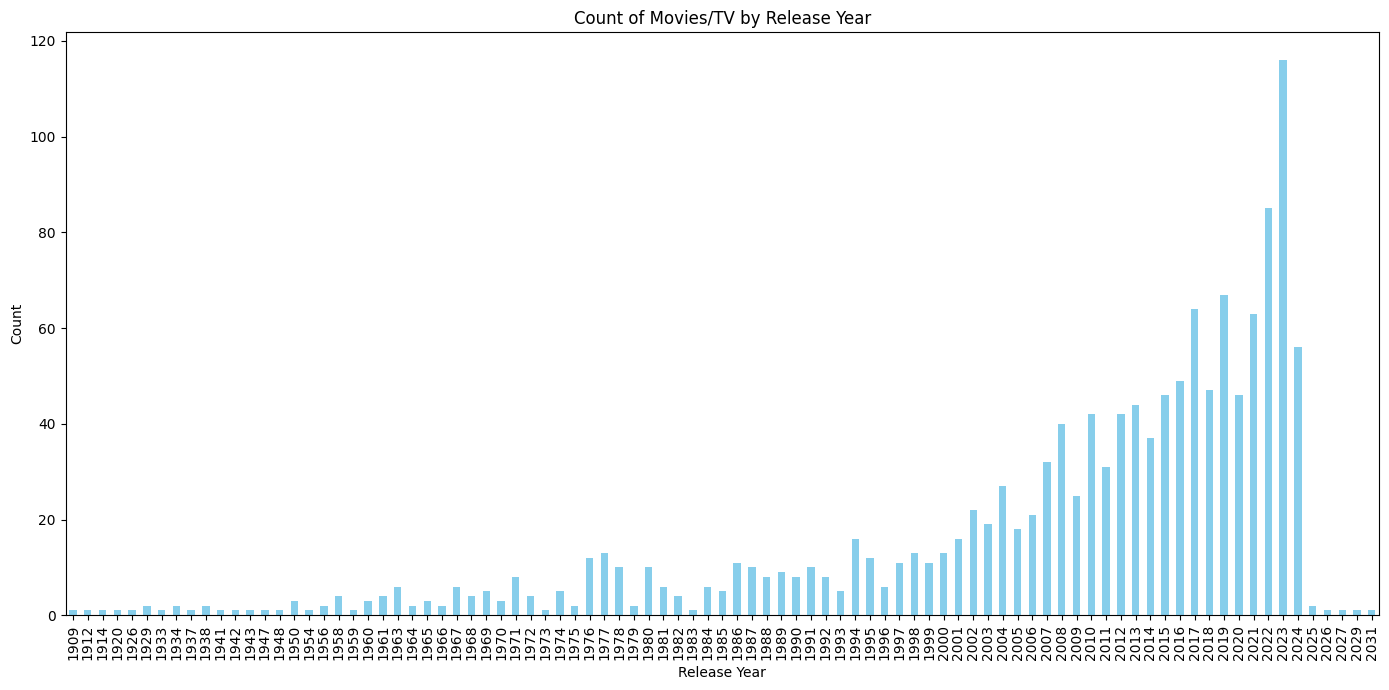

In [92]:
import matplotlib.pyplot as plt

# We need to clean the releaseYear column to ensure it contains only valid numerical values
# Let's drop NaN values and convert the column to integers
movies_df_cleaned = combined_genres_df_deduped_movieId.dropna(subset=['releaseYear'])
movies_df_cleaned['releaseYear'] = movies_df_cleaned['releaseYear'].astype(int)

# Now we can create a count of movies per year
release_year_counts = movies_df_cleaned['releaseYear'].value_counts().sort_index()

# Plotting the counts of movies per release year
plt.figure(figsize=(14,7))
release_year_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Movies/TV by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit all labels
plt.show()

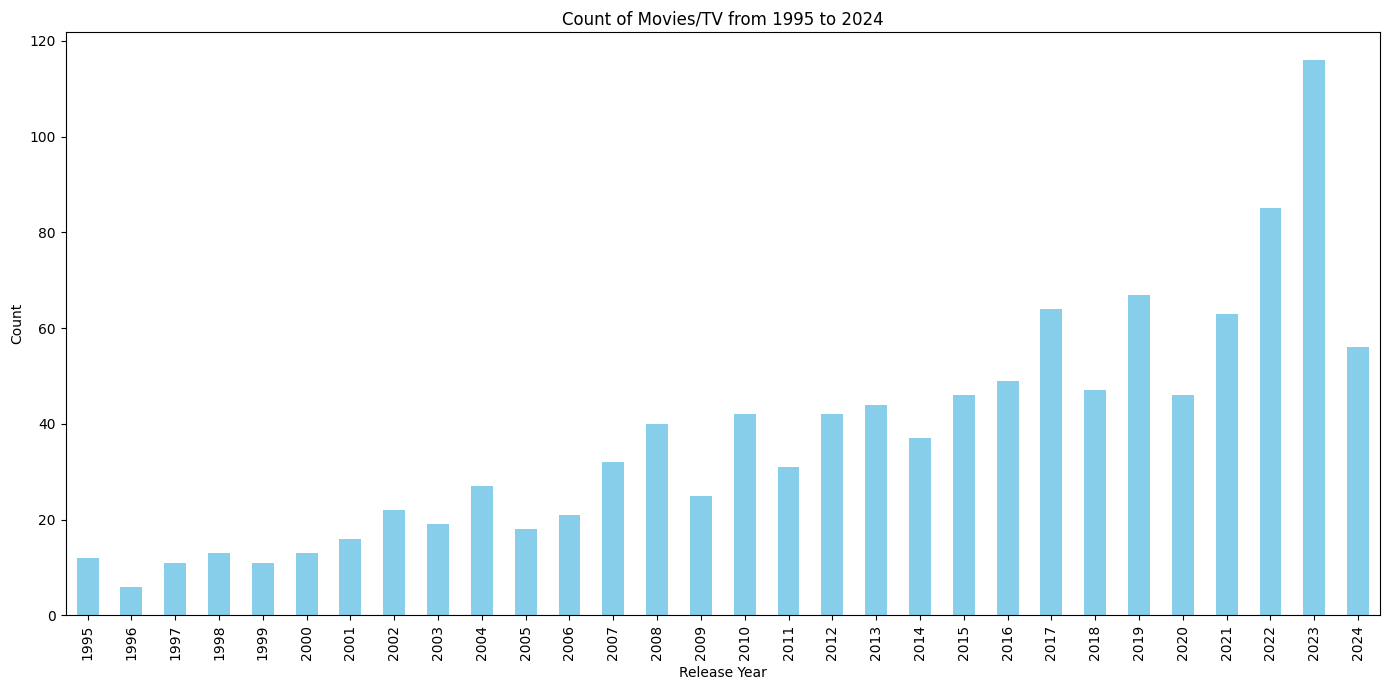

In [93]:
# Filtering the DataFrame for release years from 1995 to 2024
filtered_movies_df = movies_df_cleaned[(movies_df_cleaned['releaseYear'] >= 1995) & (movies_df_cleaned['releaseYear'] <= 2024)]

# Recalculating the count of movies per year for the filtered range
filtered_release_year_counts = filtered_movies_df['releaseYear'].value_counts().sort_index()

# Plotting the filtered counts of movies per release year
plt.figure(figsize=(14,7))
filtered_release_year_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Movies/TV from 1995 to 2024')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit all labels
plt.show()

In [94]:
# Counting the number of movies featuring Mahesh Babu
mahesh_babu_movie_count = combined_genres_df_deduped_movieId[combined_genres_df_deduped_movieId['cast'].str.contains('Mahesh Babu', na=False)].shape[0]
mahesh_babu_movie_count

18

In [95]:
# Filtering to show titles that feature Mahesh Babu
mahesh_babu_movies = combined_genres_df_deduped_movieId[combined_genres_df_deduped_movieId['cast'].str.contains('Mahesh Babu', na=False)]

mahesh_babu_movies[['title', 'releaseYear', 'genres', 'cast']]

,title,releaseYear,genres,cast
0,Guntur Kaaram,2024.0,"Action, Drama","Mahesh Babu, Sreeleela"
20,SS Rajamouli's #SSMB29,NaN,"Action, Adventure, Thriller",Mahesh Babu
176,Dookudu,2011.0,"Action, Comedy, Drama","Mahesh Babu, Samantha Ruth Prabhu"
305,Takkari Donga,2002.0,"Action, Adventure, Comedy, Western","Mahesh Babu, Lisa Ray"
373,Sarileru Neekevvaru,2020.0,"Action, Comedy, Drama","Mahesh Babu, Rashmika Mandanna"
422,Business Man,2012.0,"Action, Crime, Drama","Mahesh Babu, Kajal Aggarwal"
429,Seethamma Vaakitlo Sirimalle Chettu,2013.0,"Comedy, Drama","Venkatesh Daggubati, Mahesh Babu"
430,Bharath Ane Nenu,2018.0,"Action, Drama, Thriller","Mahesh Babu, Kiara Advani"
1240,Pokiri,2006.0,"Action, Crime, Thriller","Mahesh Babu, Ileana D'Cruz"
1252,Sarkaru Vaari Paata,2022.0,"Action, Drama","Mahesh Babu, Keerthy Suresh"


In [96]:
# Counting the number of movies featuring Mahesh Babu
pawan_kalyan_movie_count = combined_genres_df_deduped_movieId[combined_genres_df_deduped_movieId['cast'].str.contains('Pawan Kalyan', na=False)].shape[0]
pawan_kalyan_movie_count

12

In [97]:
# Filtering to show titles that feature Mahesh Babu
pawan_kalyan_movies = combined_genres_df_deduped_movieId[combined_genres_df_deduped_movieId['cast'].str.contains('Pawan Kalyan', na=False)]

pawan_kalyan_movies[['title', 'releaseYear', 'genres', 'cast']]

,title,releaseYear,genres,cast
43,Gokulamlo Seetha,1997.0,"Drama, Romance","Pawan Kalyan, Raasi"
76,Tholi Prema,1998.0,"Drama, Romance","Pawan Kalyan, Kirti Reddy"
168,Attarintiki Daredi,2013.0,"Action, Comedy, Drama","Pawan Kalyan, Samantha Ruth Prabhu"
1313,Gabbar Singh,2012.0,"Action, Comedy, Crime","Pawan Kalyan, Shruti Haasan"
1314,Sardaar Gabbar Singh,2016.0,"Action, Comedy, Crime","Pawan Kalyan, Kajal Aggarwal"
1373,Khushi,2001.0,"Drama, Romance","Pawan Kalyan, Bhoomika Chawla"
1479,Jalsa,2008.0,"Action, Comedy","Pawan Kalyan, Ileana D'Cruz"
2118,Bheemla Nayak,2022.0,"Action, Drama, Thriller","Pawan Kalyan, Rana Daggubati"
2120,Vakeel Saab,2021.0,"Action, Crime, Drama, Thriller","Pawan Kalyan, Nivetha Thomas"
2194,Gopala Gopala,2015.0,"Comedy, Drama, Fantasy","Venkatesh Daggubati, Pawan Kalyan"


In [98]:
# Filtering the dataset for action movies released in 2023
action_movies_2023 = combined_genres_df_deduped_movieId[
    (combined_genres_df_deduped_movieId['genres'].str.contains('Action', na=False)) &
    (combined_genres_df_deduped_movieId['releaseYear'] == 2023)
]

# Counting the action movies released in 2023
action_movies_2023_count = action_movies_2023.shape[0]
action_movies_2023_count

33

In [99]:
# Displaying the action movies released in 2023
action_movies_2023[['title', 'releaseYear', 'genres', 'cast']]

,title,releaseYear,genres,cast
71,Kick Me,2023.0,"Action, Comedy, Horror","Santiago Vasquez, Ramone Armstrong"
101,The Marvels,2023.0,"Action, Adventure, Fantasy","Brie Larson, Teyonah Parris"
115,Spider-Man: Across the Spider-Verse,2023.0,"Animation, Action, Adventure, Fantasy, Sci-Fi","Shameik Moore, Hailee Steinfeld"
335,Bholaa Shankar,2023.0,"Action, Crime, Drama, Thriller","Chiranjeevi, Tamannaah Bhatia"
366,Shehzada,2023.0,"Action, Comedy, Drama","Kartik Aaryan, Kriti Sanon"
405,King of Kotha,2023.0,"Action, Crime, Drama, Thriller","Soubin Shahir, Dulquer Salmaan"
1058,Animal,2023.0,"Action, Crime, Drama, Thriller","Ranbir Kapoor, Anil Kapoor"
1120,Agni Siragugal,2023.0,"Action, Thriller","Arun Vijay, Vijay Antony"
1161,"Saas, Bahu Aur Flamingo",2023.0,"Action, Crime, Drama","Dimple Kapadia, Rohan Singh"
1170,Chatrapathi,2023.0,"Action, Drama","Sai Srinivas Bellamkonda, Nushrratt Bharuccha"


<ipython-input-100-1aa8a398637a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  action_movies_all_years_cleaned['releaseYear'] = action_movies_all_years_cleaned['releaseYear'].astype(int)


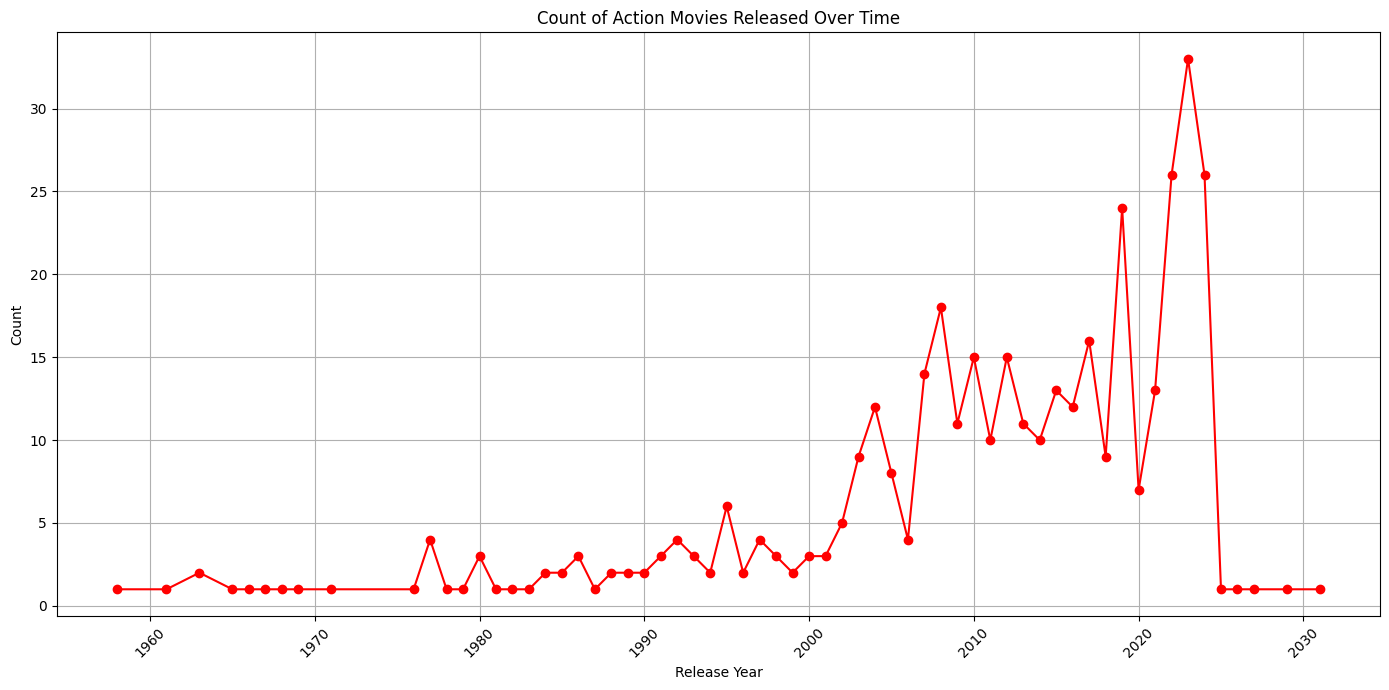

In [100]:
# Filtering the dataset for all action movies
action_movies_all_years = combined_genres_df_deduped_movieId[
    combined_genres_df_deduped_movieId['genres'].str.contains('Action', na=False)
]

# Cleaning 'releaseYear' column to ensure it contains only valid numerical values
action_movies_all_years_cleaned = action_movies_all_years.dropna(subset=['releaseYear'])
action_movies_all_years_cleaned['releaseYear'] = action_movies_all_years_cleaned['releaseYear'].astype(int)

# Calculating the count of action movies per year
action_movies_year_counts = action_movies_all_years_cleaned['releaseYear'].value_counts().sort_index()

# Plotting the counts of action movies per release year
plt.figure(figsize=(14,7))
action_movies_year_counts.plot(kind='line', color='red', marker='o')
plt.title('Count of Action Movies Released Over Time')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit all labels
plt.show()

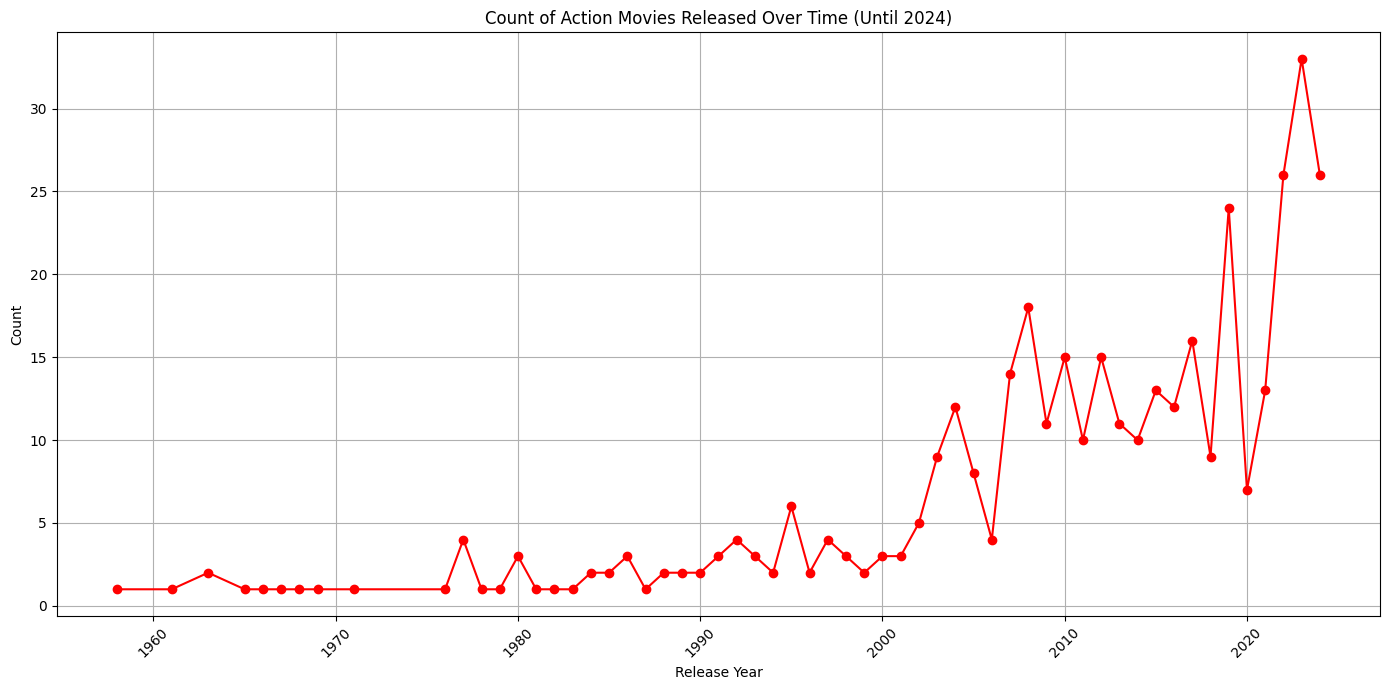

In [101]:
# Filtering the dataset to eliminate action movies with release years from 2025 onwards
action_movies_until_2024 = action_movies_all_years_cleaned[action_movies_all_years_cleaned['releaseYear'] <= 2024]

# Recalculating the count of action movies per year for the updated range
action_movies_year_counts_until_2024 = action_movies_until_2024['releaseYear'].value_counts().sort_index()

# Plotting the updated counts of action movies per release year
plt.figure(figsize=(14,7))
action_movies_year_counts_until_2024.plot(kind='line', color='red', marker='o')
plt.title('Count of Action Movies Released Over Time (Until 2024)')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit all labels
plt.show()

In [102]:
# Filtering the entire deduplicated dataset to include only entries up to the year 2024
combined_genres_df_until_2024 = combined_genres_df_deduped_movieId[
    combined_genres_df_deduped_movieId['releaseYear'] <= 2024
]

# Confirming the changes by checking the range of years now present in the dataset
year_range = (combined_genres_df_until_2024['releaseYear'].min(), combined_genres_df_until_2024['releaseYear'].max())
total_entries_until_2024 = combined_genres_df_until_2024.shape[0]

year_range, total_entries_until_2024

((1909.0, 2024.0), 1362)

In [103]:
display(combined_genres_df_until_2024)

,imageURL,movieId,title,type,typeId,imdbRank,cast,releaseYear,duration,genres,cast1,cast2
0,"{'height': 2147, 'imageUrl': 'https://m.media-...",tt14564000,Guntur Kaaram,feature,movie,6177.0,"Mahesh Babu, Sreeleela",2024.0,NaN,"Action, Drama",Mahesh Babu,Sreeleela
1,"{'height': 1600, 'imageUrl': 'https://m.media-...",tt21908802,Sweet Kaaram Coffee,TV series,tvSeries,33880.0,"Lakshmi, Madhoo",2023.0,NaN,"Drama, Family",Lakshmi,Madhoo
2,"{'height': 1600, 'imageUrl': 'https://m.media-...",tt28684462,Kaagaz 2,feature,movie,5287.0,"Anupam Kher, Darshan Kumaar",2024.0,NaN,Drama,Anupam Kher,Darshan Kumaar
4,"{'height': 1080, 'imageUrl': 'https://m.media-...",tt9569610,Kaagaz,feature,movie,24419.0,"Pankaj Tripathi, Monal Gajjar",2021.0,NaN,"Biography, Comedy, Drama",Pankaj Tripathi,Monal Gajjar
5,"{'height': 1219, 'imageUrl': 'https://m.media-...",tt1496729,Aaranya Kaandam,feature,movie,60121.0,"Sampath Raj, Jackie Shroff",2010.0,NaN,"Action, Comedy, Crime, Thriller",Sampath Raj,Jackie Shroff
...,...,...,...,...,...,...,...,...,...,...,...,...
2541,"{'height': 1280, 'imageUrl': 'https://m.media-...",tt5297578,Zindagi Kitni Haseen Hay,feature,movie,47431.0,"Feroze Khan, Sajal Ali",2016.0,NaN,"Adventure, Drama, Romance",Feroze Khan,Sajal Ali
2542,"{'height': 900, 'imageUrl': 'https://m.media-a...",tt12826694,Zindagi Jhand Hai,TV series,tvSeries,60671.0,"Mohit Kesar, Khwahish Matthew",2020.0,NaN,Drama,Mohit Kesar,Khwahish Matthew
2543,"{'height': 1000, 'imageUrl': 'https://m.media-...",tt11813946,Zindagi inShort,TV series,tvSeries,85247.0,"Neena Gupta, Divya Dutta",2020.0,2020-2020,"Comedy, Drama, Romance",Neena Gupta,Divya Dutta
2544,"{'height': 960, 'imageUrl': 'https://m.media-a...",tt11497834,Circus of Life,feature,movie,82502.0,"Arif Hassan, Samiya Mumtaz",2019.0,NaN,Drama,Arif Hassan,Samiya Mumtaz


In [104]:
movie_count_until_2024 = combined_genres_df_until_2024[combined_genres_df_until_2024['typeId'].str.lower() == 'movie']['typeId'].count()
movie_count_until_2024

965

In [105]:
# Creating a new DataFrame 'movies_df' that contains only the rows where 'type' is 'movie'
movies_until_2024_df = combined_genres_df_until_2024[combined_genres_df_until_2024['typeId'].str.lower() == 'movie']

movies_until_2024_df.tail()

,imageURL,movieId,title,type,typeId,imdbRank,cast,releaseYear,duration,genres,cast1,cast2
2537,"{'height': 1500, 'imageUrl': 'https://m.media-...",tt6842524,"Hare Krishna! The Mantra, the Movement and the...",feature,movie,114550.0,"A.C. Bhaktivedanta Swami, Bhaktisiddhanta Sara...",2017.0,NaN,Documentary,A.C. Bhaktivedanta Swami,Bhaktisiddhanta Saraswati
2539,"{'height': 1333, 'imageUrl': 'https://m.media-...",tt5946128,Dear Zindagi,feature,movie,24221.0,"Alia Bhatt, Shah Rukh Khan",2016.0,NaN,"Drama, Romance",Alia Bhatt,Shah Rukh Khan
2540,"{'height': 918, 'imageUrl': 'https://m.media-a...",tt9884202,Zindagi Zindabaad,feature,movie,40072.0,"Ninja, Mandy Takhar",2023.0,NaN,"Action, Biography, Drama",Ninja,Mandy Takhar
2541,"{'height': 1280, 'imageUrl': 'https://m.media-...",tt5297578,Zindagi Kitni Haseen Hay,feature,movie,47431.0,"Feroze Khan, Sajal Ali",2016.0,NaN,"Adventure, Drama, Romance",Feroze Khan,Sajal Ali
2544,"{'height': 960, 'imageUrl': 'https://m.media-a...",tt11497834,Circus of Life,feature,movie,82502.0,"Arif Hassan, Samiya Mumtaz",2019.0,NaN,Drama,Arif Hassan,Samiya Mumtaz


In [106]:
tvSeries_count_until_2024 = combined_genres_df_until_2024[combined_genres_df_until_2024['typeId'] == 'tvSeries']['typeId'].count()
tvSeries_count_until_2024

221

In [107]:
tvSeries_until_2024_df = combined_genres_df_until_2024[combined_genres_df_until_2024['typeId'] == 'tvSeries']

tvSeries_until_2024_df.tail(n=2000)

,imageURL,movieId,title,type,typeId,imdbRank,cast,releaseYear,duration,genres,cast1,cast2
1,"{'height': 1600, 'imageUrl': 'https://m.media-...",tt21908802,Sweet Kaaram Coffee,TV series,tvSeries,33880.0,"Lakshmi, Madhoo",2023.0,NaN,"Drama, Family",Lakshmi,Madhoo
9,"{'height': 1080, 'imageUrl': 'https://m.media-...",tt13854248,The Legend of Hanuman,TV series,tvSeries,14747.0,"Daman Baggan, Sharad Kelkar",2021.0,NaN,"Animation, Adventure, Fantasy",Daman Baggan,Sharad Kelkar
38,"{'height': 1800, 'imageUrl': 'https://m.media-...",tt7718110,Hightown,TV series,tvSeries,290.0,"Monica Raymund, Riley Voelkel",2020.0,2020-2024,"Crime, Drama, Mystery",Monica Raymund,Riley Voelkel
39,"{'height': 1000, 'imageUrl': 'https://m.media-...",tt0123349,Hi-de-Hi!,TV series,tvSeries,16821.0,"Paul Shane, Ruth Madoc",1980.0,1980-1988,Comedy,Paul Shane,Ruth Madoc
42,"{'height': 655, 'imageUrl': 'https://m.media-a...",tt11928034,Seetha,TV series,tvSeries,154408.0,"Swasika Vijay, Shanavas Shanu",2017.0,NaN,"Drama, Romance",Swasika Vijay,Shanavas Shanu
...,...,...,...,...,...,...,...,...,...,...,...,...
2494,"{'height': 2560, 'imageUrl': 'https://m.media-...",tt26660582,Jab We Matched,TV series,tvSeries,142239.0,"Jasmin Bhasin, Mayur More",2023.0,NaN,"Comedy, Drama, Romance",Jasmin Bhasin,Mayur More
2501,"{'height': 1000, 'imageUrl': 'https://m.media-...",tt2467372,Brooklyn Nine-Nine,TV series,tvSeries,86.0,"Andy Samberg, Stephanie Beatriz",2013.0,2013-2021,"Comedy, Crime",Andy Samberg,Stephanie Beatriz
2542,"{'height': 900, 'imageUrl': 'https://m.media-a...",tt12826694,Zindagi Jhand Hai,TV series,tvSeries,60671.0,"Mohit Kesar, Khwahish Matthew",2020.0,NaN,Drama,Mohit Kesar,Khwahish Matthew
2543,"{'height': 1000, 'imageUrl': 'https://m.media-...",tt11813946,Zindagi inShort,TV series,tvSeries,85247.0,"Neena Gupta, Divya Dutta",2020.0,2020-2020,"Comedy, Drama, Romance",Neena Gupta,Divya Dutta


In [109]:
combined_genres_df_until_2024.tail(n=870)

,imageURL,movieId,title,type,typeId,imdbRank,cast,releaseYear,duration,genres,cast1,cast2
1228,"{'height': 1350, 'imageUrl': 'https://m.media-...",tt14420552,Maharani,TV series,tvSeries,1989.0,"Huma Qureshi, Uday Atroliya",2021.0,NaN,Drama,Huma Qureshi,Uday Atroliya
1231,"{'height': 1185, 'imageUrl': 'https://m.media-...",tt0167260,The Lord of the Rings: The Return of the King,feature,movie,412.0,"Elijah Wood, Viggo Mortensen",2003.0,NaN,"Action, Adventure, Drama, Fantasy",Elijah Wood,Viggo Mortensen
1232,"{'height': 1024, 'imageUrl': 'https://m.media-...",tt7465992,Mahanati,feature,movie,66471.0,"Keerthy Suresh, Dulquer Salmaan",2018.0,NaN,"Biography, Drama",Keerthy Suresh,Dulquer Salmaan
1235,"{'height': 576, 'imageUrl': 'https://m.media-a...",tt0140348,Mahanadi,feature,movie,100289.0,"Kamal Haasan, Sukanya",1994.0,NaN,"Crime, Drama",Kamal Haasan,Sukanya
1236,"{'height': 755, 'imageUrl': 'https://m.media-a...",tt4424228,The Patriarch,feature,movie,77188.0,"Temuera Morrison, Akuhata Keefe",2016.0,NaN,Drama,Temuera Morrison,Akuhata Keefe
...,...,...,...,...,...,...,...,...,...,...,...,...
2541,"{'height': 1280, 'imageUrl': 'https://m.media-...",tt5297578,Zindagi Kitni Haseen Hay,feature,movie,47431.0,"Feroze Khan, Sajal Ali",2016.0,NaN,"Adventure, Drama, Romance",Feroze Khan,Sajal Ali
2542,"{'height': 900, 'imageUrl': 'https://m.media-a...",tt12826694,Zindagi Jhand Hai,TV series,tvSeries,60671.0,"Mohit Kesar, Khwahish Matthew",2020.0,NaN,Drama,Mohit Kesar,Khwahish Matthew
2543,"{'height': 1000, 'imageUrl': 'https://m.media-...",tt11813946,Zindagi inShort,TV series,tvSeries,85247.0,"Neena Gupta, Divya Dutta",2020.0,2020-2020,"Comedy, Drama, Romance",Neena Gupta,Divya Dutta
2544,"{'height': 960, 'imageUrl': 'https://m.media-a...",tt11497834,Circus of Life,feature,movie,82502.0,"Arif Hassan, Samiya Mumtaz",2019.0,NaN,Drama,Arif Hassan,Samiya Mumtaz


In [111]:
combined_genres_df_until_2024.to_csv('combined_genres_df_until_2024.csv', index=False)

In [113]:
import requests
import json

# Define the API request options
url = 'https://movies-tv-shows-database.p.rapidapi.com/'
params = {'movieid': 'tt14564000'}
headers = {
    'Type': 'get-movie-details',
    'X-RapidAPI-Key': 'e523378212mshcc6c0ef26bd5764p15f9a3jsn2ddb6afafbe8',
    'X-RapidAPI-Host': 'movies-tv-shows-database.p.rapidapi.com'
}

# Perform the API request
try:
    response = requests.get(url, params=params, headers=headers)
    # Ensure the response status is 200 (OK)
    if response.status_code == 200:
        # Convert response data to JSON format
        data = response.json()

        # Optionally, you can print the entire response data to see all fields
        print(json.dumps(data, indent=2))

        # To access and print specific data, you can do it as follows:
        # print(f"Title: {data['title']}")
        # Add similar print statements for other fields you're interested in

    else:
        print(f"Error fetching movie details, status code: {response.status_code}")

except Exception as e:
    print(f"An error occurred: {e}")

Error fetching movie details, status code: 429


In [150]:
import requests
import pandas as pd

def fetch_movie_details(movie_id, headers):
    url = f'https://movies-tv-shows-database.p.rapidapi.com/'
    params = {'movieid': movie_id}
    response = requests.get(url, headers=headers, params=params)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to fetch details for movie ID {movie_id}. Status code: {response.status_code}")
        return None

# Update this path to your input CSV file containing movie IDs
input_csv_path = '/content/combined_genres_df_until_2024.csv'
df_movie_ids = pd.read_csv(input_csv_path)

# Filter out movie IDs not starting with 't'
df_movie_ids_filtered = df_movie_ids[df_movie_ids['movieId'].str.startswith('t')]

# Headers for the API request
headers = {
    'Type': 'get-movie-details',
    'X-RapidAPI-Key': 'e523378212mshcc6c0ef26bd5764p15f9a3jsn2ddb6afafbe8',
    'X-RapidAPI-Host': 'movies-tv-shows-database.p.rapidapi.com'
}

movie_details = []

def safe_join(data):
    """Safely join data that is expected to be iterable. If data is not iterable, return it as is."""
    if isinstance(data, list):
        return ', '.join(data)
    return data  # Return the data as is if it's not a list

# Iterate over the filtered movie IDs
for movie_id in df_movie_ids_filtered['movieId']:
    data = fetch_movie_details(movie_id, headers)
    if data:
        details = {
            'movieId': movie_id,
            'title': data.get('title', ''),
            'year': data.get('year', ''),
            'imdb_rating': data.get('imdb_rating', ''),
            'vote_count': data.get('vote_count', ''),
            'popularity': data.get('popularity', ''),
            'runtime': data.get('runtime', ''),
            'rated': data.get('rated', ''),
            'stars': safe_join(data.get('stars', [])),
            'genres': safe_join(data.get('genres', [])),
            'directors': safe_join(data.get('directors', [])),
            'countries': safe_join(data.get('countries', [])),
            'language': safe_join(data.get('language', []))
        }
        movie_details.append(details)

# Create a DataFrame from the collected movie details
df_movie_details = pd.DataFrame(movie_details)

# Update this path to where you want to save the output CSV file
output_csv_path = '/content/new.csv'
df_movie_details.to_csv(output_csv_path, index=False)
print(f"Movie details saved to {output_csv_path}")

Failed to fetch details for movie ID tt7465992. Status code: 429
Failed to fetch details for movie ID tt0140348. Status code: 429
Failed to fetch details for movie ID tt4424228. Status code: 429
Failed to fetch details for movie ID tt10305848. Status code: 429
Failed to fetch details for movie ID tt15964848. Status code: 429
Failed to fetch details for movie ID tt22440336. Status code: 429
Failed to fetch details for movie ID tt0816258. Status code: 429
Failed to fetch details for movie ID tt1579659. Status code: 429
Failed to fetch details for movie ID tt8816230. Status code: 429
Failed to fetch details for movie ID tt1451409. Status code: 429
Failed to fetch details for movie ID tt1667852. Status code: 429
Failed to fetch details for movie ID tt0187412. Status code: 429
Failed to fetch details for movie ID tt5039054. Status code: 429
Failed to fetch details for movie ID tt5495258. Status code: 429
Failed to fetch details for movie ID tt10795658. Status code: 429
Failed to fetch detai

In [182]:
import requests
import pandas as pd

# Define function to fetch movie details using alternating API keys
def fetch_movie_details(movie_id, api_keys):
    global current_key_index, api_call_counts  # Use global variables to track API key usage and counts
    # Setup for the API request
    url = 'https://movies-tv-shows-database.p.rapidapi.com/'
    params = {'movieid': movie_id}
    headers = {
        'Type': 'get-movie-details',
        'X-RapidAPI-Key': api_keys[current_key_index],  # Use the current API key
        'X-RapidAPI-Host': 'movies-tv-shows-database.p.rapidapi.com'
    }

    response = requests.get(url, headers=headers, params=params)
    if response.status_code == 200:
        api_call_counts[current_key_index] += 1  # Increment the call count for the current key
        if api_call_counts[current_key_index] >= 500:  # Check if the current key has reached its limit
            current_key_index = (current_key_index + 1) % len(api_keys)  # Switch to the next key
        return response.json()
    else:
        print(f"Failed to fetch details for movie ID {movie_id}. Status code: {response.status_code}")
        return None

# Initialize variables to manage API key rotation and limits
api_keys = ['5100f0d6c5msh359e4cc77e24fb8p157627jsnc2001b556b2e', '9a9eb0b9afmsh945ee84069ef0c8p1461b7jsn52b320d3ef04']
current_key_index = 0
api_call_counts = [0, 0]  # Track how many calls have been made with each key

input_csv_path = '/content/combined_genres_df_until_2024.csv'  # Update with your actual path
df_movie_ids = pd.read_csv(input_csv_path)

# Filter rows starting from the 1232nd (considering 0-based indexing)
df_movie_ids_filtered = df_movie_ids.iloc[1231:]  # Adjust the row number as needed

movie_details = []

# Iterate over filtered movie IDs, respecting API call limits
for movie_id in df_movie_ids_filtered['movieId']:
    if sum(api_call_counts) < 870:  # Ensure total limit of 870 is not exceeded
        data = fetch_movie_details(movie_id, api_keys)
        if data:
            details = {
                'movieId': movie_id,
                'title': data.get('title', ''),
                'year': data.get('year', ''),
                'imdb_rating': data.get('imdb_rating', ''),
                'vote_count': data.get('vote_count', ''),
                'popularity': data.get('popularity', ''),
                'runtime': data.get('runtime', ''),
                'rated': data.get('rated', ''),
                'stars': ', '.join(data.get('stars', [])) if isinstance(data.get('stars'), list) else '',
                'genres': ', '.join(data.get('genres', [])) if isinstance(data.get('genres'), list) else '',
                'directors': ', '.join(data.get('directors', [])) if isinstance(data.get('directors'), list) else '',
                'countries': ', '.join(data.get('countries', [])) if isinstance(data.get('countries'), list) else '',
                'language': ', '.join(data.get('language', [])) if isinstance(data.get('language'), list) else ''
            }
            movie_details.append(details)
    else:
        break  # Stop processing once the total limit is reached

# Create a DataFrame from the collected movie details and append to existing data if present
output_csv_path = 'new1.csv'  # Update with your actual path
if movie_details:  # Check if we have new details to add
    df_new_movie_details = pd.DataFrame(movie_details)
    # Append to existing file if it exists, else write a new file
    try:
        df_existing = pd.read_csv(output_csv_path)
        df_final = pd.concat([df_existing, df_new_movie_details], ignore_index=True)
    except FileNotFoundError:
        df_final = df_new_movie_details
    df_final.to_csv(output_csv_path, index=False)
    print(f"Movie details updated and saved to {output_csv_path}")
else:
    print("No new movie details to add.")

Movie details updated and saved to new1.csv


In [114]:
# prompt: read new.csv and inspect

import pandas as pd

# Update this path to your saved CSV file
csv_path = '/content/new1.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_path)

# Inspect the DataFrame
print(df.head())

# Display basic information about the DataFrame
df.info()

# Display a summary of the DataFrame
print(df.describe())

# Check for missing values
print(df.isnull().sum())


      movieId    title    year  imdb_rating  vote_count  popularity  runtime  \
0   tt9482146      NaN     NaN          NaN         NaN         NaN      NaN   
1  tt15428134    Dunki  2023.0        6.292        48.0      26.144    159.0   
2   tt5013056  Dunkirk  2017.0        7.455     15679.0      40.806    107.0   
3   tt0051565  Dunkirk  1958.0        6.700        54.0      11.606    134.0   
4  tt31401398      NaN     NaN          NaN         NaN         NaN      NaN   

      rated                                              stars  \
0       NaN                                                NaN   
1   U/A 13+  Shah Rukh Khan, Taapsee Pannu, Vikram Kochhar,...   
2     PG-13  Fionn Whitehead, Tom Hardy, Mark Rylance, Kenn...   
3  APPROVED  John Mills, Richard Attenborough, Bernard Lee,...   
4       NaN                                                NaN   

                                              genres  \
0                                                NaN   
1  Comedy,

In [115]:
display(df)

,movieId,title,year,imdb_rating,vote_count,popularity,runtime,rated,stars,genres,directors,countries,language
0,tt9482146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt15428134,Dunki,2023.0,6.292,48.0,26.144,159.0,U/A 13+,"Shah Rukh Khan, Taapsee Pannu, Vikram Kochhar,...","Comedy, Drama, Action, Adventure, Animation, B...","Rajkumar Hirani, Lakshmipriya Devi, Menaka Nag...","India, United States of America","English, ਪੰਜਾਬੀ, हिन्दी, hi"
2,tt5013056,Dunkirk,2017.0,7.455,15679.0,40.806,107.0,PG-13,"Fionn Whitehead, Tom Hardy, Mark Rylance, Kenn...","War, Action, Drama, History, Thriller","Steve Gehrke, Christopher Nolan, Alina Gatti, ...","France, Netherlands, United Kingdom, United St...","English, Français, Deutsch, en, English, Frenc..."
3,tt0051565,Dunkirk,1958.0,6.700,54.0,11.606,134.0,APPROVED,"John Mills, Richard Attenborough, Bernard Lee,...","Drama, War, Action, History","Leslie Norman, Lee Turner, Michael Birkett","United Kingdom, UK, USA","English, en, English, German"
4,tt31401398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,tt5297578,Zindagi Kitni Haseen Hay,2016.0,7.700,3.0,0.690,150.0,U,"Feroze Khan, Sajal Ali, Nabeel Zuberi, Nayyar ...","Romance, Drama, Adventure",Anjum Shahzad,Pakistan,"اردو, ur"
127,tt12826694,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128,tt11813946,Zindagi inShort,2020.0,5.000,1.0,0.000,113.0,NaN,"Aisha Ahmed, Deepak Dobriyal, Divya Dutta, Nee...","Comedy, Drama","Vijayeta Kumar, Vinay Chhawal, Rakesh Sain, Ga...",NaN,NaN
129,tt11497834,Circus of Life,2020.0,9.300,3.0,1.522,138.0,2h 18min,"Arif Hassan, Samiya Mumtaz, Eman Suleman, Ali ...","Drama, Thriller, Family",Sarmad Sultan Khoosat,Pakistan,"ਪੰਜਾਬੀ, اردو"


In [116]:
import pandas as pd

# Load the two CSV files
df1 = pd.read_csv('/content/new.csv')
df2 = pd.read_csv('/content/new1.csv')

# Combine the two DataFrames
combined_df = pd.concat([df1, df2], ignore_index=True)

# Save the combined DataFrame to a new CSV file
output_csv_path = 'combined_new.csv'
combined_df.to_csv(output_csv_path, index=False)

print(f"The combined DataFrame has been saved to {output_csv_path}.")

The combined DataFrame has been saved to combined_new.csv.


In [117]:
# prompt: read combined_new and print rows

import pandas as pd

# Update this path to your combined CSV file
csv_path = '/content/combined_new.csv'

# Read the combined CSV file into a DataFrame
combined_df = pd.read_csv(csv_path)

display(combined_df)

,movieId,title,year,imdb_rating,vote_count,popularity,runtime,rated,stars,genres,directors,countries,language
0,tt14564000,Guntur Kaaram,2024.0,7.0,7.0,21.342,156.0,UA,"Mahesh Babu, Sree Leela, Ramya Krishnan, Praka...","Action, Drama, Family",Trivikram Srinivas,India,"తెలుగు, te"
1,tt21908802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tt28684462,Kaagaz 2,2024.0,0.0,0.0,5.721,125.0,NaN,"Anupam Kher, Satish Kaushik, Neena Gupta, Dars...",Drama,"Nishant Kaushik, V. K. Prakash",India,हिन्दी
3,tt9569610,Kaagaz,2021.0,6.7,3.0,3.806,109.0,UA,"Pankaj Tripathi, Amar Upadhyay, Monal Gajjar, ...","Drama, Comedy, Biography","Satish Kaushik, Zeel Thacker",India,हिन्दी
4,tt1496729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
620,tt5297578,Zindagi Kitni Haseen Hay,2016.0,7.7,3.0,0.690,150.0,U,"Feroze Khan, Sajal Ali, Nabeel Zuberi, Nayyar ...","Romance, Drama, Adventure",Anjum Shahzad,Pakistan,"اردو, ur"
621,tt12826694,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
622,tt11813946,Zindagi inShort,2020.0,5.0,1.0,0.000,113.0,NaN,"Aisha Ahmed, Deepak Dobriyal, Divya Dutta, Nee...","Comedy, Drama","Vijayeta Kumar, Vinay Chhawal, Rakesh Sain, Ga...",NaN,NaN
623,tt11497834,Circus of Life,2020.0,9.3,3.0,1.522,138.0,2h 18min,"Arif Hassan, Samiya Mumtaz, Eman Suleman, Ali ...","Drama, Thriller, Family",Sarmad Sultan Khoosat,Pakistan,"ਪੰਜਾਬੀ, اردو"


In [118]:
# Load the combined DataFrame
combined_df = pd.read_csv('/content/combined_new.csv')

# Count how many movies have "Action" listed in their genres
action_movies_count = combined_df['genres'].str.contains('Action', case=False, na=False).sum()

action_movies_count

170

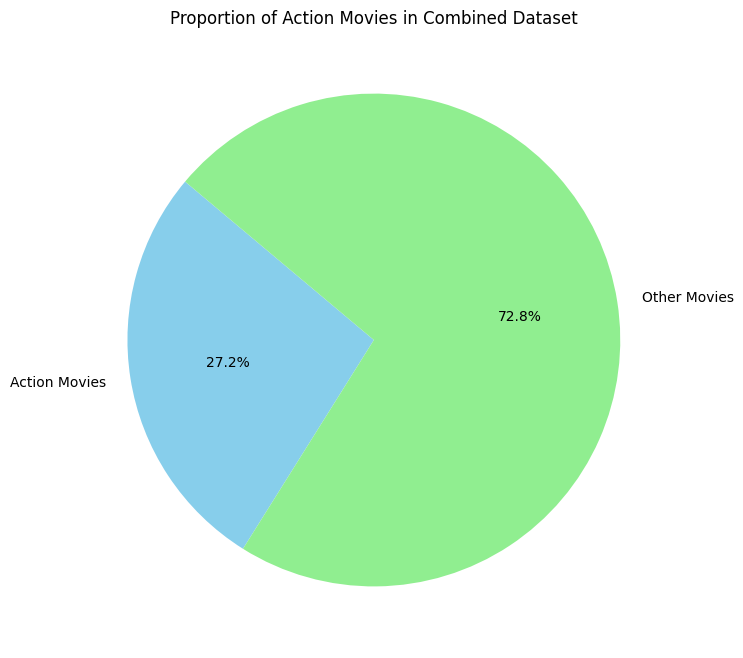

In [119]:
# Check if "Action" is a part of the genres for each movie
action_movies = combined_df[combined_df['genres'].str.contains('Action', case=False, na=False)]

# Count how many action movies are there
action_movies_count = action_movies.shape[0]

# Visualization
import matplotlib.pyplot as plt

# Data for plotting
categories = ['Action Movies', 'Other Movies']
counts = [action_movies_count, combined_df.shape[0] - action_movies_count]

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen'])
plt.title('Proportion of Action Movies in Combined Dataset')
plt.show()

In [120]:
mahesh_babu_movies_count = combined_df['stars'].str.contains('Mahesh Babu', case=False, na=False).sum()

mahesh_babu_movies_count

6

In [121]:
# Filter for movies featuring Mahesh Babu
mahesh_babu_movies = combined_df[combined_df['stars'].str.contains('Mahesh Babu', case=False, na=False)]

# Display the movies featuring Mahesh Babu
display(mahesh_babu_movies)

,movieId,title,year,imdb_rating,vote_count,popularity,runtime,rated,stars,genres,directors,countries,language
0,tt14564000,Guntur Kaaram,2024.0,7.0,7.0,21.342,156.0,UA,"Mahesh Babu, Sree Leela, Ramya Krishnan, Praka...","Action, Drama, Family",Trivikram Srinivas,India,"తెలుగు, te"
109,tt1756476,Dookudu,2011.0,6.1,24.0,1.699,174.0,NaN,"Mahesh Babu, Samantha Akkineni, Sonu Sood, Kot...","Action, Drama, Comedy","Saikishore, Sreenu Vaitla",India,తెలుగు
235,tt10773090,Sarileru Neekevvaru,2020.0,5.4,15.0,4.260,169.0,UA,"Mahesh Babu, Vijayashanti, Rashmika Mandanna, ...","Action, Comedy, Drama",Anil Ravipudi,India,తెలుగు
271,tt2071613,Businessman,2012.0,6.7,24.0,2.899,133.0,A,"Mahesh Babu, Kajal Agarwal, Prakash Raj, Ayesh...","Action, Crime","Puri Jagannath, Puri Jagannadh",India,"हिन्दी, தமிழ், తెలుగు"
276,tt2198161,Seethamma Vakitlo Sirimalle Chettu,2013.0,5.9,15.0,2.086,159.0,UA,"Venkatesh, Mahesh Babu, Anjali, Samantha Ruth ...","Family, Drama, Comedy","Vinod Lingala, Srikanth Addala",India,"తెలుగు, Telugu"
277,tt6980546,Bharat Ane Nenu,2018.0,6.6,53.0,7.477,173.0,UA,"Mahesh Babu, Kiara Advani, Prakash Raj, R. Sar...","Drama, Action, Thriller","Koratala Siva, Siva Koratala",India,"తెలుగు, te, English, Telugu"


In [122]:
import pandas as pd

# Load the DataFrame
df = pd.read_csv('/content/combined_new.csv')

# Assuming a maximum of 5 stars and 3 genres for illustration purposes
# Adjust these numbers based on your actual data or requirements

# Split "stars" into a list and expand into sub-columns
max_stars = 15
stars_expanded = df['stars'].str.split(',', expand=True).iloc[:, :max_stars]
stars_expanded.columns = [f'Star_{i+1}' for i in range(stars_expanded.shape[1])]

# Split "genres" into a list and expand into sub-columns
max_genres = 3
genres_expanded = df['genres'].str.split(',', expand=True).iloc[:, :max_genres]
genres_expanded.columns = [f'Genre_{i+1}' for i in range(genres_expanded.shape[1])]

# Concatenate the original DataFrame with the expanded "stars" and "genres" columns
df_expanded = pd.concat([df, stars_expanded, genres_expanded], axis=1)

# Drop the original "stars" and "genres" columns if desired
df_expanded.drop(['stars', 'genres'], axis=1, inplace=True)

# Save the modified DataFrame to a new CSV file
output_csv_path = '/content/combined_new.csv'
df_expanded.to_csv(output_csv_path, index=False)

print(f"The modified DataFrame has been saved to {output_csv_path}.")


The modified DataFrame has been saved to /content/combined_new.csv.


In [123]:
# prompt: read the csv and display

import pandas as pd

# Update the path to your CSV file
csv_path = '/content/combined_new.csv'

# Read the CSV file into a DataFrame
new_df = pd.read_csv(csv_path)

# Display the DataFrame
display(new_df)


,movieId,title,year,imdb_rating,vote_count,popularity,runtime,rated,directors,countries,...,Star_9,Star_10,Star_11,Star_12,Star_13,Star_14,Star_15,Genre_1,Genre_2,Genre_3
0,tt14564000,Guntur Kaaram,2024.0,7.0,7.0,21.342,156.0,UA,Trivikram Srinivas,India,...,Meenakshi Chaudhary,Easwari Rao,Raghu Babu,Rahul Ravindran,Jagapati Babu,Ajay,Ajay Ghosh,Action,Drama,Family
1,tt21908802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tt28684462,Kaagaz 2,2024.0,0.0,0.0,5.721,125.0,NaN,"Nishant Kaushik, V. K. Prakash",India,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Drama,NaN,NaN
3,tt9569610,Kaagaz,2021.0,6.7,3.0,3.806,109.0,UA,"Satish Kaushik, Zeel Thacker",India,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Drama,Comedy,Biography
4,tt1496729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620,tt5297578,Zindagi Kitni Haseen Hay,2016.0,7.7,3.0,0.690,150.0,U,Anjum Shahzad,Pakistan,...,Alan Hakim,Adil Fayaz,Bawany Safwan,NaN,NaN,NaN,NaN,Romance,Drama,Adventure
621,tt12826694,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
622,tt11813946,Zindagi inShort,2020.0,5.0,1.0,0.000,113.0,NaN,"Vijayeta Kumar, Vinay Chhawal, Rakesh Sain, Ga...",NaN,...,Rima Kallingal,Arun Kushwah,Jitin Gulati,Nakuul Mehta,Vedika Nanwani,Shafina Patel,Rytasha Rathore,Comedy,Drama,NaN
623,tt11497834,Circus of Life,2020.0,9.3,3.0,1.522,138.0,2h 18min,Sarmad Sultan Khoosat,Pakistan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Drama,Thriller,Family


In [124]:
# Load the combined DataFrame again
df_combined = pd.read_csv('/content/combined_new.csv')

# Since there was confusion about the structure, let's ensure we approach this correctly.
# We will search for "Trivikram Srinivas" within a single 'directors' column for simplicity.
# If the directors were split into multiple columns, a different approach would be needed.

# Filter movies where 'directors' column contains 'Trivikram Srinivas'
trivikram_movies = df_combined[df_combined['directors'].str.contains('Trivikram Srinivas', case=False, na=False)]

# Check if any movies were found and proceed accordingly
if not trivikram_movies.empty:
    # Display the filtered DataFrame
    display(trivikram_movies)
else:
    print("No movies directed by Trivikram Srinivas were found.")

,movieId,title,year,imdb_rating,vote_count,popularity,runtime,rated,directors,countries,...,Star_9,Star_10,Star_11,Star_12,Star_13,Star_14,Star_15,Genre_1,Genre_2,Genre_3
0,tt14564000,Guntur Kaaram,2024.0,7.0,7.0,21.342,156.0,UA,Trivikram Srinivas,India,...,Meenakshi Chaudhary,Easwari Rao,Raghu Babu,Rahul Ravindran,Jagapati Babu,Ajay,Ajay Ghosh,Action,Drama,Family
105,tt3042926,Atharintiki Daaredi,2013.0,6.7,27.0,1.770,169.0,U,Trivikram Srinivas,India,...,Vamsi Krishna,Brahmanandam,Mukesh Rishi,Rao Ramesh,Raghu Babu,Posani Krishna Murali,Bharath Reddy,Action,Comedy,Drama
230,tt9537292,Ala Vaikunthapurramuloo,2020.0,6.3,32.0,4.204,165.0,UA,Trivikram Srinivas,India,...,Navdeep,Sunil Varma,Rajendra Prasad,Rahul Ramakrishna,Brahmaji,Harshavardhan,Sachin Khedekar,Action,Drama,NaN


In [125]:
import pandas as pd

# Load the DataFrame
df = pd.read_csv('/content/combined_new.csv')

# If 'directors' contains multiple names and you're interested in the first one
df['Director_Name'] = df['directors'].str.split(',', expand=True)[0]

# Select and rename columns as needed
df_final = df[['title', 'Star_1', 'Star_2', 'Star_3', 'Star_4', 'Genre_1', 'Genre_2', 'Genre_3', 'year', 'imdb_rating', 'Director_Name', 'runtime']].copy()

# Rename columns to match your requirements
df_final.rename(columns={
    'title': 'Title',
    'year': 'Release Year',
    'imdb_rating': 'IMDb Rating',
    'runtime': 'Runtime'
}, inplace=True)

# Save the new DataFrame to a CSV file
output_csv_path = '/content/final_movie_details.csv'
df_final.to_csv(output_csv_path, index=False)

print(f"The DataFrame with specified columns has been saved to {output_csv_path}.")

The DataFrame with specified columns has been saved to /content/final_movie_details.csv.


In [126]:
# prompt: read final_movie_details and display

df_final = pd.read_csv('/content/final_movie_details.csv')
display(df_final)


,Title,Star_1,Star_2,Star_3,Star_4,Genre_1,Genre_2,Genre_3,Release Year,IMDb Rating,Director_Name,Runtime
0,Guntur Kaaram,Mahesh Babu,Sree Leela,Ramya Krishnan,Prakash Raj,Action,Drama,Family,2024.0,7.0,Trivikram Srinivas,156.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Kaagaz 2,Anupam Kher,Satish Kaushik,Neena Gupta,Darshan Kumaar,Drama,NaN,NaN,2024.0,0.0,Nishant Kaushik,125.0
3,Kaagaz,Pankaj Tripathi,Amar Upadhyay,Monal Gajjar,Mita Vasisht,Drama,Comedy,Biography,2021.0,6.7,Satish Kaushik,109.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
620,Zindagi Kitni Haseen Hay,Feroze Khan,Sajal Ali,Nabeel Zuberi,Nayyar Ejaz,Romance,Drama,Adventure,2016.0,7.7,Anjum Shahzad,150.0
621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
622,Zindagi inShort,Aisha Ahmed,Deepak Dobriyal,Divya Dutta,Neena Gupta,Comedy,Drama,NaN,2020.0,5.0,Vijayeta Kumar,113.0
623,Circus of Life,Arif Hassan,Samiya Mumtaz,Eman Suleman,Ali Kureshi,Drama,Thriller,Family,2020.0,9.3,Sarmad Sultan Khoosat,138.0


In [127]:
df_final = pd.read_csv('/content/final_movie_details.csv')

In [128]:
df_final.isna().sum()

Title            297
Star_1           328
Star_2           329
Star_3           332
Star_4           340
Genre_1          325
Genre_2          358
Genre_3          421
Release Year     295
IMDb Rating      295
Director_Name    341
Runtime          328
dtype: int64

In [129]:
df_final.head(n=20)

,Title,Star_1,Star_2,Star_3,Star_4,Genre_1,Genre_2,Genre_3,Release Year,IMDb Rating,Director_Name,Runtime
0,Guntur Kaaram,Mahesh Babu,Sree Leela,Ramya Krishnan,Prakash Raj,Action,Drama,Family,2024.0,7.000,Trivikram Srinivas,156.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Kaagaz 2,Anupam Kher,Satish Kaushik,Neena Gupta,Darshan Kumaar,Drama,NaN,NaN,2024.0,0.000,Nishant Kaushik,125.0
3,Kaagaz,Pankaj Tripathi,Amar Upadhyay,Monal Gajjar,Mita Vasisht,Drama,Comedy,Biography,2021.0,6.700,Satish Kaushik,109.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,The Legend of Hanuman,Da Man,Shakti Singh,Sanket Mhatre,Vikrant Chaturvedi,Animation,History,NaN,2021.0,9.400,NaN,25.0
8,Hanu-Man,Teja Sajja,Vinay Rai,Amritha Aiyer,Varalaxmi Sarathkumar,Fantasy,Action,Comedy,2024.0,6.625,Prasanth Varma,159.0
9,Hanuman,Sanjeev Jaiswal,Mukesh Khanna,Viraj,Mona Shetty,Animation,Fantasy,NaN,2005.0,7.000,Milind Ukey,88.0


In [130]:
import pandas as pd

# Load the DataFrame from the CSV file
df_combined = pd.read_csv('/content/final_movie_details.csv')

# Remove rows where all values are NaN
df_cleaned = df_combined.dropna(how='all')

# Save the cleaned DataFrame to a new CSV file
df_cleaned.to_csv('/content/cleaned_combined_new.csv', index=False)

In [131]:
df_cleaned.tail(n=20)

,Title,Star_1,Star_2,Star_3,Star_4,Genre_1,Genre_2,Genre_3,Release Year,IMDb Rating,Director_Name,Runtime
587,Major,Adivi Sesh,Sobhita Dhulipala,Saiee Manjrekar,Prakash Raj,Action,History,Drama,2022.0,1.000,Sashi Kiran Tikka,150.0
588,Major Dundee,Charlton Heston,Richard Harris,Jim Hutton,James Coburn,Western,Action,Adventure,1965.0,6.622,Cliff Lyons,125.0
589,Major League II,Charlie Sheen,Tom Berenger,Corbin Bernsen,Dennis Haysbert,Comedy,Sport,NaN,1994.0,5.500,David S. Ward,105.0
590,Shyam Singha Roy,Nani,Sai Pallavi,Krithi Shetty,Madonna Sebastian,Drama,Romance,Horror,2021.0,7.300,Rahul Sankrityan,157.0
591,Jab We Met,Shahid Kapoor,Kareena Kapoor Khan,Tarun Arora,Dara Singh,Drama,Comedy,Romance,2007.0,7.400,Imtiaz Ali,138.0
597,Brooklyn Nine-Nine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000,NaN,NaN
598,PK,Aamir Khan,Anushka Sharma,Sushant Singh Rajput,Saurabh Shukla,Comedy,Drama,Adventure,2014.0,7.706,Junaid Khan,153.0
599,P.K. and the Kid,Molly Ringwald,Paul Le Mat,Alex Rocco,Charles Hallahan,Drama,NaN,NaN,1987.0,5.000,Lou Lombardo,89.0
602,Love Today,Pradeep Ranganathan,Ivana,Akshaya Udhayakumar,Raveena Ravi,Comedy,Romance,Drama,2022.0,7.152,Pradeep Ranganathan,154.0
605,Love Today,Divya Khosla Kumar,NaN,NaN,NaN,NaN,NaN,NaN,2004.0,0.000,NaN,90.0


In [134]:
df_cleaned.isna().sum()

Title            0
Star_1           0
Star_2           0
Star_3           0
Star_4           0
Genre_1          0
Genre_2          0
Genre_3          0
Release Year     0
IMDb Rating      0
Director_Name    0
Runtime          0
dtype: int64

In [133]:
df_cleaned['Title'] = df_cleaned['Title'].replace(np.nan, 'unknown')
df_cleaned['Star_1'] = df_cleaned['Star_1'].replace(np.nan, 'unknown')
df_cleaned['Star_2'] = df_cleaned['Star_2'].replace(np.nan, 'unknown')
df_cleaned['Star_3'] = df_cleaned['Star_3'].replace(np.nan, 'unknown')
df_cleaned['Star_4'] = df_cleaned['Star_4'].replace(np.nan, 'unknown')
df_cleaned['Genre_1'] = df_cleaned['Genre_1'].replace(np.nan, 'unknown')
df_cleaned['Genre_2'] = df_cleaned['Genre_2'].replace(np.nan, 'unknown')
df_cleaned['Genre_3'] = df_cleaned['Genre_3'].replace(np.nan, 'unknown')
df_cleaned['Director_Name'] = df_cleaned['Director_Name'].replace(np.nan, 'unknown')
df_cleaned['Runtime'] = df_cleaned['Runtime'].replace(np.nan, 'unknown')
df_cleaned['Title'] = df_cleaned['Title'].replace(np.nan, 'unknown')

<ipython-input-133-5a358e2de14d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Title'] = df_cleaned['Title'].replace(np.nan, 'unknown')
<ipython-input-133-5a358e2de14d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Star_1'] = df_cleaned['Star_1'].replace(np.nan, 'unknown')
<ipython-input-133-5a358e2de14d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [135]:
df_cleaned.tail(n=100)

,Title,Star_1,Star_2,Star_3,Star_4,Genre_1,Genre_2,Genre_3,Release Year,IMDb Rating,Director_Name,Runtime
458,Chatrapathi,Bellamkonda Srinivas,Nushrratt Bharuccha,Sharad Kelkar,Bhagyashree,Action,Drama,unknown,2023.0,0.000,V. V. Vinayak,124.0
459,Chatrapathi,Prabhas,Shriya Saran,Bhanupriya,Pradeep Ram Singh Rawat,Drama,Action,unknown,2005.0,5.800,S.S. Rajamouli,158.0
461,Student Services,Déborah François,Mathieu Demy,Alain Cauchi,Benjamin Siksou,Drama,Action,Romance,2010.0,5.126,Emmanuelle Bercot,101.0
462,Student of the Year,Sidharth Malhotra,Alia Bhatt,Varun Dhawan,Rishi Kapoor,Comedy,Drama,Music,2012.0,5.800,Karan Johar,146.0
463,Student Bodies,Kristen Riter,Matthew Goldsby,Jerry Belson,Joe Flood,Comedy,Horror,Mystery,1981.0,5.700,Mickey Rose,86.0
...,...,...,...,...,...,...,...,...,...,...,...,...
618,Dear Zindagi,Alia Bhatt,Shah Rukh Khan,Ali Zafar,Kunal Kapoor,Drama,Romance,Action,2016.0,7.072,Rukhshida David,151.0
619,Zindagi Zindabaad,Ninja,Mandy Takhar,Sukhdeep Sukh,Sardar Sohi,Action,Drama,History,2023.0,0.000,Nasir Zaman,90.0
620,Zindagi Kitni Haseen Hay,Feroze Khan,Sajal Ali,Nabeel Zuberi,Nayyar Ejaz,Romance,Drama,Adventure,2016.0,7.700,Anjum Shahzad,150.0
622,Zindagi inShort,Aisha Ahmed,Deepak Dobriyal,Divya Dutta,Neena Gupta,Comedy,Drama,unknown,2020.0,5.000,Vijayeta Kumar,113.0


## Data Modeling

In [138]:
def get_recommendations(title, cosine_sim=cosine_sim, df=df_cleaned):
    # Check if the movie title exists in the DataFrame
    if not df['Title'].str.contains(title, case=False, na=False).any():
        return f"No movies found with title matching '{title}'"

    # Get the index of the movie that matches the title
    idx = df[df['Title'].str.contains(title, case=False, na=False)].index[0]

    # Get the pairwise similarity scores of all movies with that movie and sort them
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the indices of the 10 most similar movies
    movie_indices = [i[0] for i in sim_scores[1:11]]  # Skip the first one as it is the queried movie itself

    # Return the top 10 most similar movies
    return df.iloc[movie_indices][['Title', 'Star_1', 'Star_2', 'Star_3', 'Star_4', 'IMDb Rating', 'Director_Name']]

# Replace 'Your Movie Title Here' with an actual title from your DataFrame
recommendations = get_recommendations('Happy Days', cosine_sim, df_cleaned)

# Check the type of recommendations to decide how to display them
if isinstance(recommendations, pd.DataFrame):
    print(recommendations)
else:
    print(recommendations)

                           Title             Star_1               Star_2  \
23          Seetha Rama Kalyanam           Haranath            Gitanjali   
212  Agent Sai Srinivasa Athreya  Naveen Polishetty        Shruti Sharma   
333   Malli Malli Idhi Rani Roju         Sharwanand         Nithya Menen   
177       Padi Padi Leche Manasu         Sharwanand          Sai Pallavi   
540                      Virunga        André Bauma   Emmanuel de Merode   
109                      Dookudu        Mahesh Babu    Samantha Akkineni   
429                Jai Lava Kusa  N.T. Rama Rao Jr.       Nivetha Thomas   
317                   Ishq Vishk      Shahid Kapoor           Amrita Rao   
268                     Miruthan         Jayam Ravi        Lakshmi Menon   
324                         Aata          Siddharth        Ileana D'Cruz   

                Star_3                      Star_4  IMDb Rating  \
23       N.T. Rama Rao   Taraka Rama Rao Nandamuri          7.8   
212              Suhas       

In [139]:
combined_genres_df_until_2024.head()

,imageURL,movieId,title,type,typeId,imdbRank,cast,releaseYear,duration,genres,cast1,cast2
0,"{'height': 2147, 'imageUrl': 'https://m.media-...",tt14564000,Guntur Kaaram,feature,movie,6177.0,"Mahesh Babu, Sreeleela",2024.0,NaN,"Action, Drama",Mahesh Babu,Sreeleela
1,"{'height': 1600, 'imageUrl': 'https://m.media-...",tt21908802,Sweet Kaaram Coffee,TV series,tvSeries,33880.0,"Lakshmi, Madhoo",2023.0,NaN,"Drama, Family",Lakshmi,Madhoo
2,"{'height': 1600, 'imageUrl': 'https://m.media-...",tt28684462,Kaagaz 2,feature,movie,5287.0,"Anupam Kher, Darshan Kumaar",2024.0,NaN,Drama,Anupam Kher,Darshan Kumaar
4,"{'height': 1080, 'imageUrl': 'https://m.media-...",tt9569610,Kaagaz,feature,movie,24419.0,"Pankaj Tripathi, Monal Gajjar",2021.0,NaN,"Biography, Comedy, Drama",Pankaj Tripathi,Monal Gajjar
5,"{'height': 1219, 'imageUrl': 'https://m.media-...",tt1496729,Aaranya Kaandam,feature,movie,60121.0,"Sampath Raj, Jackie Shroff",2010.0,NaN,"Action, Comedy, Crime, Thriller",Sampath Raj,Jackie Shroff


In [140]:
df_cleaned.head()

,Title,Star_1,Star_2,Star_3,Star_4,Genre_1,Genre_2,Genre_3,Release Year,IMDb Rating,Director_Name,Runtime
0,Guntur Kaaram,Mahesh Babu,Sree Leela,Ramya Krishnan,Prakash Raj,Action,Drama,Family,2024.0,7.000,Trivikram Srinivas,156.0
2,Kaagaz 2,Anupam Kher,Satish Kaushik,Neena Gupta,Darshan Kumaar,Drama,unknown,unknown,2024.0,0.000,Nishant Kaushik,125.0
3,Kaagaz,Pankaj Tripathi,Amar Upadhyay,Monal Gajjar,Mita Vasisht,Drama,Comedy,Biography,2021.0,6.700,Satish Kaushik,109.0
7,The Legend of Hanuman,Da Man,Shakti Singh,Sanket Mhatre,Vikrant Chaturvedi,Animation,History,unknown,2021.0,9.400,unknown,25.0
8,Hanu-Man,Teja Sajja,Vinay Rai,Amritha Aiyer,Varalaxmi Sarathkumar,Fantasy,Action,Comedy,2024.0,6.625,Prasanth Varma,159.0
